In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
#import scipy.stats as stats


Using TensorFlow backend.


In [2]:
df=pd.read_csv('jack1090525.csv',index_col=0).drop(columns=['PurposeItem','MaterialItem'])
#df.head()'RecStat','SameAprvSeq','HavePlan'

In [68]:
df['Item']=df['Item'].fillna('無').astype(str)
df['AdjBuildArea']=df['AdjBuildArea'].fillna(0)
df['AdjBuildArea']
df['CityItem']=df['CityItem'].astype(str)
#df['AreaItem']=df['AreaItem'].astype(str)
df['BuildType']=df['BuildType'].astype(str)
df.head(1)

,BuildPurpose,CityItem,AreaItem,BuildMaterial,PublicArea,BuildType,BuildComDate,BuildLayer,AplraiseUnitValue,Item,AdjBuildArea,AplraiseValue,RecStat,DebtPerc,SameAprvSeq,HavePlan
ID,,,,,,,,,,,,,,,,
1,Z,桃園市,桃園區,4.0,1.26,R1,00:00.0,1,0.0,無,0.0,43298000.0,1.0,50.0,NaN,NaN


In [69]:
print(df.dtypes)

BuildPurpose          object
CityItem              object
AreaItem              object
BuildMaterial        float64
PublicArea           float64
BuildType             object
BuildComDate          object
BuildLayer            object
AplraiseUnitValue    float64
Item                  object
AdjBuildArea         float64
AplraiseValue        float64
RecStat              float64
DebtPerc             float64
SameAprvSeq          float64
HavePlan             float64
dtype: object


In [70]:
df['AplraiseValue']=df['AplraiseValue'].fillna(0)
df = df.drop(df[(df['AplraiseValue']<90000)].index)
len(df['AplraiseValue'])

116

In [71]:
corrmat =df.corr()
corrmat

,BuildMaterial,PublicArea,AplraiseUnitValue,AdjBuildArea,AplraiseValue,RecStat,DebtPerc,SameAprvSeq,HavePlan
BuildMaterial,1.000000,0.393331,-0.027432,0.443286,0.272203,NaN,-0.063080,0.403183,NaN
PublicArea,0.393331,1.000000,-0.163090,0.461323,0.201920,NaN,-0.146922,0.000055,NaN
AplraiseUnitValue,-0.027432,-0.163090,1.000000,-0.222040,0.315254,NaN,-0.163740,-0.060540,NaN
AdjBuildArea,0.443286,0.461323,-0.222040,1.000000,0.033893,NaN,-0.132990,-0.151227,NaN
AplraiseValue,0.272203,0.201920,0.315254,0.033893,1.000000,NaN,0.204025,-0.088428,NaN
RecStat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DebtPerc,-0.063080,-0.146922,-0.163740,-0.132990,0.204025,NaN,1.000000,NaN,NaN
SameAprvSeq,0.403183,0.000055,-0.060540,-0.151227,-0.088428,NaN,NaN,1.000000,NaN
HavePlan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
y_train= np.log(df['AplraiseValue'].values+1)
y_train

array([17.58361703, 16.66523398, 17.58361703, 16.39867765, 16.44206874,
       16.44206874, 16.36285383, 16.87908843, 15.55232111, 17.58361703,
       16.50392939, 15.74534954, 17.33605423, 17.33605423, 15.92232174,
       16.44206874, 16.44206874, 16.44206874, 16.87908843, 15.29141731,
       15.29141731, 15.68175903, 16.2176337 , 16.51148825, 16.49940474,
       16.53213192, 17.58361703, 17.58361703, 15.35022514, 17.33605423,
       15.60727019, 16.68744013, 17.58361703, 16.87908843, 16.44206874,
       16.44206874, 15.24001815, 18.47765703, 15.29141731, 16.66523398,
       16.87908843, 17.24074997, 15.35022514, 16.2176337 , 16.2176337 ,
       17.58361703, 17.48207162, 16.66523398, 16.66523398, 16.66523398,
       16.66523398, 16.44206874, 16.44206874, 16.66523398, 16.66523398,
       16.66523398, 16.66523398, 15.52101346, 15.29141731, 14.77715737,
       16.50580411, 14.9300792 , 16.53213192, 15.55369782, 15.55232111,
       17.33605423, 16.44206874, 16.44206874, 15.52569855, 16.19

In [73]:
train_df=pd.get_dummies(df)
print(df.shape,train_df.shape)

(116, 16) (116, 82)


In [74]:
train_df.head(1)

,BuildMaterial,PublicArea,AplraiseUnitValue,AdjBuildArea,AplraiseValue,RecStat,DebtPerc,SameAprvSeq,HavePlan,BuildPurpose_A,...,BuildLayer_B2-1F,BuildLayer_B3,BuildLayer_T,BuildLayer_地下三層,BuildLayer_地下二層,Item_其他,Item_無,Item_花台,Item_陽台,Item_露台
ID,,,,,,,,,,,,,,,,,,,,,
1,4.0,1.26,0.0,0.0,43298000.0,1.0,50.0,NaN,NaN,0,...,0,0,0,0,0,0,1,0,0,0


In [75]:
X_train, X_test, y_train, y_test = train_test_split(train_df, y_train, test_size=0.33, random_state=1)

In [76]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
    #model.add(Dropout(0.9))
    model.add(Dense(8, activation='relu'))
    #model.add(Dropout(0.9))
    #model.add(Dense(384, activation='relu'))
    
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer ='adam', loss = 'mean_squared_error', 
              metrics=['mean_absolute_error'])
    return model

In [77]:
model = create_model()
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 8)                 664       
_________________________________________________________________
dense_47 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 9         
Total params: 745
Trainable params: 745
Non-trainable params: 0
_________________________________________________________________


In [78]:
#model = create_model()
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=9000, batch_size=32)
loss,acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test loss:', acc)

Train on 77 samples, validate on 39 samples
Epoch 1/9000
77/77 [==============================] - 0s 5ms/step - loss: 270.2190 - mean_absolute_error: 16.4172 - val_loss: 271.9382 - val_mean_absolute_error: 16.4595
Epoch 2/9000
77/77 [==============================] - 0s 320us/step - loss: 270.1206 - mean_absolute_error: 16.4142 - val_loss: 271.8395 - val_mean_absolute_error: 16.4565
Epoch 3/9000
77/77 [==============================] - ETA: 0s - loss: 274.3688 - mean_absolute_error: 16.53 - 0s 247us/step - loss: 270.0223 - mean_absolute_error: 16.4112 - val_loss: 271.7408 - val_mean_absolute_error: 16.4535
Epoch 4/9000
77/77 [==============================] - 0s 247us/step - loss: 269.9235 - mean_absolute_error: 16.4082 - val_loss: 271.6421 - val_mean_absolute_error: 16.4505
Epoch 5/9000
77/77 [==============================] - 0s 260us/step - loss: 269.8251 - mean_absolute_error: 16.4052 - val_loss: 271.5434 - val_mean_absolute_error: 16.4475
Epoch 6/9000
77/77 [======================

Epoch 48/9000
77/77 [==============================] - 0s 234us/step - loss: 265.6178 - mean_absolute_error: 16.2765 - val_loss: 267.3253 - val_mean_absolute_error: 16.3187
Epoch 49/9000
77/77 [==============================] - 0s 247us/step - loss: 265.5206 - mean_absolute_error: 16.2735 - val_loss: 267.2278 - val_mean_absolute_error: 16.3158
Epoch 50/9000
77/77 [==============================] - 0s 234us/step - loss: 265.4230 - mean_absolute_error: 16.2705 - val_loss: 267.1303 - val_mean_absolute_error: 16.3128
Epoch 51/9000
77/77 [==============================] - 0s 234us/step - loss: 265.3259 - mean_absolute_error: 16.2675 - val_loss: 267.0327 - val_mean_absolute_error: 16.3098
Epoch 52/9000
77/77 [==============================] - 0s 234us/step - loss: 265.2286 - mean_absolute_error: 16.2645 - val_loss: 266.9351 - val_mean_absolute_error: 16.3068
Epoch 53/9000
77/77 [==============================] - 0s 234us/step - loss: 265.1313 - mean_absolute_error: 16.2616 - val_loss: 266.83

77/77 [==============================] - 0s 234us/step - loss: 256.5846 - mean_absolute_error: 15.9966 - val_loss: 258.2689 - val_mean_absolute_error: 16.0389
Epoch 143/9000
77/77 [==============================] - 0s 221us/step - loss: 256.4893 - mean_absolute_error: 15.9936 - val_loss: 258.1740 - val_mean_absolute_error: 16.0359
Epoch 144/9000
77/77 [==============================] - 0s 234us/step - loss: 256.3949 - mean_absolute_error: 15.9907 - val_loss: 258.0789 - val_mean_absolute_error: 16.0329
Epoch 145/9000
77/77 [==============================] - 0s 234us/step - loss: 256.3002 - mean_absolute_error: 15.9877 - val_loss: 257.9838 - val_mean_absolute_error: 16.0300
Epoch 146/9000
77/77 [==============================] - 0s 221us/step - loss: 256.2055 - mean_absolute_error: 15.9847 - val_loss: 257.8887 - val_mean_absolute_error: 16.0270
Epoch 147/9000
77/77 [==============================] - 0s 247us/step - loss: 256.1107 - mean_absolute_error: 15.9818 - val_loss: 257.7939 - val_

77/77 [==============================] - 0s 247us/step - loss: 247.7765 - mean_absolute_error: 15.7189 - val_loss: 249.4381 - val_mean_absolute_error: 15.7612
Epoch 237/9000
77/77 [==============================] - 0s 247us/step - loss: 247.6842 - mean_absolute_error: 15.7159 - val_loss: 249.3453 - val_mean_absolute_error: 15.7582
Epoch 238/9000
77/77 [==============================] - 0s 221us/step - loss: 247.5914 - mean_absolute_error: 15.7130 - val_loss: 249.2526 - val_mean_absolute_error: 15.7553
Epoch 239/9000
77/77 [==============================] - 0s 234us/step - loss: 247.4989 - mean_absolute_error: 15.7101 - val_loss: 249.1599 - val_mean_absolute_error: 15.7523
Epoch 240/9000
77/77 [==============================] - 0s 234us/step - loss: 247.4067 - mean_absolute_error: 15.7071 - val_loss: 249.0672 - val_mean_absolute_error: 15.7494
Epoch 241/9000
77/77 [==============================] - 0s 234us/step - loss: 247.3141 - mean_absolute_error: 15.7042 - val_loss: 248.9745 - val_

77/77 [==============================] - 0s 234us/step - loss: 239.1814 - mean_absolute_error: 15.4431 - val_loss: 240.8199 - val_mean_absolute_error: 15.4854
Epoch 331/9000
77/77 [==============================] - 0s 234us/step - loss: 239.0912 - mean_absolute_error: 15.4401 - val_loss: 240.7293 - val_mean_absolute_error: 15.4824
Epoch 332/9000
77/77 [==============================] - 0s 234us/step - loss: 239.0006 - mean_absolute_error: 15.4372 - val_loss: 240.6389 - val_mean_absolute_error: 15.4795
Epoch 333/9000
77/77 [==============================] - 0s 234us/step - loss: 238.9104 - mean_absolute_error: 15.4343 - val_loss: 240.5485 - val_mean_absolute_error: 15.4766
Epoch 334/9000
77/77 [==============================] - 0s 234us/step - loss: 238.8204 - mean_absolute_error: 15.4314 - val_loss: 240.4581 - val_mean_absolute_error: 15.4737
Epoch 335/9000
77/77 [==============================] - 0s 234us/step - loss: 238.7303 - mean_absolute_error: 15.4284 - val_loss: 240.3677 - val_

77/77 [==============================] - 0s 221us/step - loss: 230.7959 - mean_absolute_error: 15.1691 - val_loss: 232.4120 - val_mean_absolute_error: 15.2114
Epoch 425/9000
77/77 [==============================] - 0s 247us/step - loss: 230.7078 - mean_absolute_error: 15.1662 - val_loss: 232.3237 - val_mean_absolute_error: 15.2085
Epoch 426/9000
77/77 [==============================] - 0s 221us/step - loss: 230.6200 - mean_absolute_error: 15.1633 - val_loss: 232.2353 - val_mean_absolute_error: 15.2056
Epoch 427/9000
77/77 [==============================] - 0s 234us/step - loss: 230.5319 - mean_absolute_error: 15.1604 - val_loss: 232.1470 - val_mean_absolute_error: 15.2027
Epoch 428/9000
77/77 [==============================] - 0s 234us/step - loss: 230.4439 - mean_absolute_error: 15.1575 - val_loss: 232.0587 - val_mean_absolute_error: 15.1998
Epoch 429/9000
77/77 [==============================] - 0s 247us/step - loss: 230.3558 - mean_absolute_error: 15.1546 - val_loss: 231.9705 - val_

77/77 [==============================] - 0s 203us/step - loss: 222.6039 - mean_absolute_error: 14.8967 - val_loss: 224.1969 - val_mean_absolute_error: 14.9390
Epoch 519/9000
77/77 [==============================] - 0s 406us/step - loss: 222.5175 - mean_absolute_error: 14.8938 - val_loss: 224.1105 - val_mean_absolute_error: 14.9361
Epoch 520/9000
77/77 [==============================] - 0s 203us/step - loss: 222.4316 - mean_absolute_error: 14.8909 - val_loss: 224.0240 - val_mean_absolute_error: 14.9332
Epoch 521/9000
77/77 [==============================] - 0s 203us/step - loss: 222.3453 - mean_absolute_error: 14.8880 - val_loss: 223.9377 - val_mean_absolute_error: 14.9303
Epoch 522/9000
77/77 [==============================] - 0s 203us/step - loss: 222.2590 - mean_absolute_error: 14.8851 - val_loss: 223.8514 - val_mean_absolute_error: 14.9274
Epoch 523/9000
77/77 [==============================] - 0s 364us/step - loss: 222.1731 - mean_absolute_error: 14.8822 - val_loss: 223.7650 - val_

77/77 [==============================] - 0s 221us/step - loss: 214.6006 - mean_absolute_error: 14.6256 - val_loss: 216.1710 - val_mean_absolute_error: 14.6679
Epoch 613/9000
77/77 [==============================] - 0s 221us/step - loss: 214.5165 - mean_absolute_error: 14.6227 - val_loss: 216.0868 - val_mean_absolute_error: 14.6650
Epoch 614/9000
77/77 [==============================] - 0s 143us/step - loss: 214.4323 - mean_absolute_error: 14.6198 - val_loss: 216.0026 - val_mean_absolute_error: 14.6622
Epoch 615/9000
77/77 [==============================] - 0s 203us/step - loss: 214.3485 - mean_absolute_error: 14.6170 - val_loss: 215.9184 - val_mean_absolute_error: 14.6593
Epoch 616/9000
77/77 [==============================] - 0s 203us/step - loss: 214.2643 - mean_absolute_error: 14.6141 - val_loss: 215.8341 - val_mean_absolute_error: 14.6564
Epoch 617/9000
77/77 [==============================] - 0s 406us/step - loss: 214.1806 - mean_absolute_error: 14.6112 - val_loss: 215.7498 - val_

77/77 [==============================] - 0s 203us/step - loss: 206.7829 - mean_absolute_error: 14.3558 - val_loss: 208.3311 - val_mean_absolute_error: 14.3982
Epoch 707/9000
77/77 [==============================] - 0s 203us/step - loss: 206.7009 - mean_absolute_error: 14.3530 - val_loss: 208.2485 - val_mean_absolute_error: 14.3953
Epoch 708/9000
77/77 [==============================] - 0s 203us/step - loss: 206.6184 - mean_absolute_error: 14.3501 - val_loss: 208.1660 - val_mean_absolute_error: 14.3924
Epoch 709/9000
77/77 [==============================] - 0s 209us/step - loss: 206.5364 - mean_absolute_error: 14.3472 - val_loss: 208.0835 - val_mean_absolute_error: 14.3896
Epoch 710/9000
77/77 [==============================] - 0s 203us/step - loss: 206.4543 - mean_absolute_error: 14.3444 - val_loss: 208.0011 - val_mean_absolute_error: 14.3867
Epoch 711/9000
77/77 [==============================] - 0s 203us/step - loss: 206.3720 - mean_absolute_error: 14.3415 - val_loss: 207.9188 - val_

77/77 [==============================] - 0s 203us/step - loss: 199.1447 - mean_absolute_error: 14.0873 - val_loss: 200.6702 - val_mean_absolute_error: 14.1296
Epoch 801/9000
77/77 [==============================] - 0s 203us/step - loss: 199.0644 - mean_absolute_error: 14.0844 - val_loss: 200.5896 - val_mean_absolute_error: 14.1268
Epoch 802/9000
77/77 [==============================] - 0s 203us/step - loss: 198.9840 - mean_absolute_error: 14.0816 - val_loss: 200.5089 - val_mean_absolute_error: 14.1239
Epoch 803/9000
77/77 [==============================] - 0s 203us/step - loss: 198.9035 - mean_absolute_error: 14.0787 - val_loss: 200.4282 - val_mean_absolute_error: 14.1211
Epoch 804/9000
77/77 [==============================] - 0s 203us/step - loss: 198.8233 - mean_absolute_error: 14.0759 - val_loss: 200.3475 - val_mean_absolute_error: 14.1182
Epoch 805/9000
77/77 [==============================] - 0s 203us/step - loss: 198.7427 - mean_absolute_error: 14.0730 - val_loss: 200.2670 - val_

77/77 [==============================] - 0s 234us/step - loss: 191.6765 - mean_absolute_error: 13.8197 - val_loss: 193.1796 - val_mean_absolute_error: 13.8620
Epoch 895/9000
77/77 [==============================] - 0s 234us/step - loss: 191.5977 - mean_absolute_error: 13.8168 - val_loss: 193.1008 - val_mean_absolute_error: 13.8592
Epoch 896/9000
77/77 [==============================] - 0s 208us/step - loss: 191.5194 - mean_absolute_error: 13.8140 - val_loss: 193.0218 - val_mean_absolute_error: 13.8563
Epoch 897/9000
77/77 [==============================] - 0s 221us/step - loss: 191.4408 - mean_absolute_error: 13.8111 - val_loss: 192.9428 - val_mean_absolute_error: 13.8535
Epoch 898/9000
77/77 [==============================] - 0s 208us/step - loss: 191.3620 - mean_absolute_error: 13.8083 - val_loss: 192.8640 - val_mean_absolute_error: 13.8506
Epoch 899/9000
77/77 [==============================] - 0s 208us/step - loss: 191.2838 - mean_absolute_error: 13.8054 - val_loss: 192.7853 - val_

Epoch 988/9000
77/77 [==============================] - 0s 203us/step - loss: 184.3793 - mean_absolute_error: 13.5531 - val_loss: 185.8598 - val_mean_absolute_error: 13.5954
Epoch 989/9000
77/77 [==============================] - 0s 203us/step - loss: 184.3025 - mean_absolute_error: 13.5502 - val_loss: 185.7828 - val_mean_absolute_error: 13.5926
Epoch 990/9000
77/77 [==============================] - 0s 203us/step - loss: 184.2256 - mean_absolute_error: 13.5474 - val_loss: 185.7059 - val_mean_absolute_error: 13.5898
Epoch 991/9000
77/77 [==============================] - 0s 203us/step - loss: 184.1489 - mean_absolute_error: 13.5446 - val_loss: 185.6290 - val_mean_absolute_error: 13.5869
Epoch 992/9000
77/77 [==============================] - 0s 269us/step - loss: 184.0724 - mean_absolute_error: 13.5418 - val_loss: 185.5520 - val_mean_absolute_error: 13.5841
Epoch 993/9000
77/77 [==============================] - 0s 229us/step - loss: 183.9955 - mean_absolute_error: 13.5389 - val_loss: 

Epoch 1035/9000
77/77 [==============================] - 0s 203us/step - loss: 180.7903 - mean_absolute_error: 13.4200 - val_loss: 182.2597 - val_mean_absolute_error: 13.4624
Epoch 1036/9000
77/77 [==============================] - 0s 203us/step - loss: 180.7144 - mean_absolute_error: 13.4172 - val_loss: 182.1837 - val_mean_absolute_error: 13.4596
Epoch 1037/9000
77/77 [==============================] - 0s 203us/step - loss: 180.6387 - mean_absolute_error: 13.4144 - val_loss: 182.1078 - val_mean_absolute_error: 13.4567
Epoch 1038/9000
77/77 [==============================] - 0s 203us/step - loss: 180.5630 - mean_absolute_error: 13.4116 - val_loss: 182.0318 - val_mean_absolute_error: 13.4539
Epoch 1039/9000
77/77 [==============================] - 0s 203us/step - loss: 180.4873 - mean_absolute_error: 13.4087 - val_loss: 181.9558 - val_mean_absolute_error: 13.4511
Epoch 1040/9000
77/77 [==============================] - 0s 203us/step - loss: 180.4116 - mean_absolute_error: 13.4059 - val_

Epoch 1082/9000
77/77 [==============================] - 0s 203us/step - loss: 177.2469 - mean_absolute_error: 13.2873 - val_loss: 178.7050 - val_mean_absolute_error: 13.3297
Epoch 1083/9000
77/77 [==============================] - 0s 203us/step - loss: 177.1717 - mean_absolute_error: 13.2845 - val_loss: 178.6298 - val_mean_absolute_error: 13.3269
Epoch 1084/9000
77/77 [==============================] - 0s 203us/step - loss: 177.0968 - mean_absolute_error: 13.2817 - val_loss: 178.5545 - val_mean_absolute_error: 13.3241
Epoch 1085/9000
77/77 [==============================] - 0s 203us/step - loss: 177.0218 - mean_absolute_error: 13.2789 - val_loss: 178.4793 - val_mean_absolute_error: 13.3212
Epoch 1086/9000
77/77 [==============================] - 0s 203us/step - loss: 176.9467 - mean_absolute_error: 13.2761 - val_loss: 178.4043 - val_mean_absolute_error: 13.3184
Epoch 1087/9000
77/77 [==============================] - 0s 203us/step - loss: 176.8720 - mean_absolute_error: 13.2732 - val_

Epoch 1129/9000
77/77 [==============================] - 0s 406us/step - loss: 173.7431 - mean_absolute_error: 13.1548 - val_loss: 175.1903 - val_mean_absolute_error: 13.1972
Epoch 1130/9000
77/77 [==============================] - 0s 203us/step - loss: 173.6691 - mean_absolute_error: 13.1520 - val_loss: 175.1159 - val_mean_absolute_error: 13.1944
Epoch 1131/9000
77/77 [==============================] - 0s 203us/step - loss: 173.5950 - mean_absolute_error: 13.1492 - val_loss: 175.0417 - val_mean_absolute_error: 13.1916
Epoch 1132/9000
77/77 [==============================] - 0s 203us/step - loss: 173.5210 - mean_absolute_error: 13.1464 - val_loss: 174.9674 - val_mean_absolute_error: 13.1888
Epoch 1133/9000
77/77 [==============================] - 0s 203us/step - loss: 173.4468 - mean_absolute_error: 13.1436 - val_loss: 174.8932 - val_mean_absolute_error: 13.1860
Epoch 1134/9000
77/77 [==============================] - 0s 203us/step - loss: 173.3728 - mean_absolute_error: 13.1408 - val_

Epoch 1176/9000
77/77 [==============================] - 0s 203us/step - loss: 170.2771 - mean_absolute_error: 13.0224 - val_loss: 171.7133 - val_mean_absolute_error: 13.0648
Epoch 1177/9000
77/77 [==============================] - 0s 203us/step - loss: 170.2038 - mean_absolute_error: 13.0196 - val_loss: 171.6397 - val_mean_absolute_error: 13.0620
Epoch 1178/9000
77/77 [==============================] - 0s 203us/step - loss: 170.1306 - mean_absolute_error: 13.0168 - val_loss: 171.5660 - val_mean_absolute_error: 13.0592
Epoch 1179/9000
77/77 [==============================] - 0s 203us/step - loss: 170.0571 - mean_absolute_error: 13.0140 - val_loss: 171.4924 - val_mean_absolute_error: 13.0564
Epoch 1180/9000
77/77 [==============================] - 0s 203us/step - loss: 169.9836 - mean_absolute_error: 13.0112 - val_loss: 171.4188 - val_mean_absolute_error: 13.0535
Epoch 1181/9000
77/77 [==============================] - 0s 203us/step - loss: 169.9103 - mean_absolute_error: 13.0084 - val_

77/77 [==============================] - 0s 208us/step - loss: 163.6097 - mean_absolute_error: 12.7639 - val_loss: 165.0239 - val_mean_absolute_error: 12.8063
Epoch 1269/9000
77/77 [==============================] - 0s 208us/step - loss: 163.5380 - mean_absolute_error: 12.7611 - val_loss: 164.9520 - val_mean_absolute_error: 12.8034
Epoch 1270/9000
77/77 [==============================] - 0s 208us/step - loss: 163.4663 - mean_absolute_error: 12.7583 - val_loss: 164.8802 - val_mean_absolute_error: 12.8006
Epoch 1271/9000
77/77 [==============================] - 0s 208us/step - loss: 163.3947 - mean_absolute_error: 12.7555 - val_loss: 164.8083 - val_mean_absolute_error: 12.7978
Epoch 1272/9000
77/77 [==============================] - 0s 196us/step - loss: 163.3233 - mean_absolute_error: 12.7526 - val_loss: 164.7363 - val_mean_absolute_error: 12.7950
Epoch 1273/9000
77/77 [==============================] - 0s 203us/step - loss: 163.2516 - mean_absolute_error: 12.7498 - val_loss: 164.6645 -

Epoch 1315/9000
77/77 [==============================] - 0s 208us/step - loss: 160.2633 - mean_absolute_error: 12.6321 - val_loss: 161.6664 - val_mean_absolute_error: 12.6745
Epoch 1316/9000
77/77 [==============================] - 0s 208us/step - loss: 160.1923 - mean_absolute_error: 12.6293 - val_loss: 161.5953 - val_mean_absolute_error: 12.6717
Epoch 1317/9000
77/77 [==============================] - 0s 208us/step - loss: 160.1217 - mean_absolute_error: 12.6265 - val_loss: 161.5242 - val_mean_absolute_error: 12.6689
Epoch 1318/9000
77/77 [==============================] - 0s 208us/step - loss: 160.0507 - mean_absolute_error: 12.6237 - val_loss: 161.4531 - val_mean_absolute_error: 12.6661
Epoch 1319/9000
77/77 [==============================] - 0s 221us/step - loss: 159.9800 - mean_absolute_error: 12.6209 - val_loss: 161.3820 - val_mean_absolute_error: 12.6633
Epoch 1320/9000
77/77 [==============================] - 0s 221us/step - loss: 159.9088 - mean_absolute_error: 12.6181 - val_

Epoch 1362/9000
77/77 [==============================] - 0s 310us/step - loss: 156.9506 - mean_absolute_error: 12.5003 - val_loss: 158.3425 - val_mean_absolute_error: 12.5427
Epoch 1363/9000
77/77 [==============================] - 0s 208us/step - loss: 156.8805 - mean_absolute_error: 12.4975 - val_loss: 158.2722 - val_mean_absolute_error: 12.5399
Epoch 1364/9000
77/77 [==============================] - 0s 208us/step - loss: 156.8102 - mean_absolute_error: 12.4947 - val_loss: 158.2019 - val_mean_absolute_error: 12.5371
Epoch 1365/9000
77/77 [==============================] - 0s 157us/step - loss: 156.7403 - mean_absolute_error: 12.4919 - val_loss: 158.1315 - val_mean_absolute_error: 12.5343
Epoch 1366/9000
77/77 [==============================] - 0s 203us/step - loss: 156.6700 - mean_absolute_error: 12.4891 - val_loss: 158.0612 - val_mean_absolute_error: 12.5315
Epoch 1367/9000
77/77 [==============================] - 0s 203us/step - loss: 156.5999 - mean_absolute_error: 12.4863 - val_

Epoch 1409/9000
77/77 [==============================] - 0s 203us/step - loss: 153.6761 - mean_absolute_error: 12.3686 - val_loss: 155.0569 - val_mean_absolute_error: 12.4110
Epoch 1410/9000
77/77 [==============================] - 0s 203us/step - loss: 153.6070 - mean_absolute_error: 12.3658 - val_loss: 154.9875 - val_mean_absolute_error: 12.4082
Epoch 1411/9000
77/77 [==============================] - 0s 406us/step - loss: 153.5376 - mean_absolute_error: 12.3630 - val_loss: 154.9182 - val_mean_absolute_error: 12.4054
Epoch 1412/9000
77/77 [==============================] - 0s 203us/step - loss: 153.4688 - mean_absolute_error: 12.3602 - val_loss: 154.8488 - val_mean_absolute_error: 12.4026
Epoch 1413/9000
77/77 [==============================] - 0s 203us/step - loss: 153.3996 - mean_absolute_error: 12.3574 - val_loss: 154.7796 - val_mean_absolute_error: 12.3998
Epoch 1414/9000
77/77 [==============================] - 0s 203us/step - loss: 153.3305 - mean_absolute_error: 12.3546 - val_

Epoch 1456/9000
77/77 [==============================] - 0s 203us/step - loss: 150.4431 - mean_absolute_error: 12.2372 - val_loss: 151.8131 - val_mean_absolute_error: 12.2796
Epoch 1457/9000
77/77 [==============================] - 0s 203us/step - loss: 150.3749 - mean_absolute_error: 12.2344 - val_loss: 151.7445 - val_mean_absolute_error: 12.2768
Epoch 1458/9000
77/77 [==============================] - 0s 203us/step - loss: 150.3065 - mean_absolute_error: 12.2317 - val_loss: 151.6760 - val_mean_absolute_error: 12.2740
Epoch 1459/9000
77/77 [==============================] - 0s 203us/step - loss: 150.2384 - mean_absolute_error: 12.2289 - val_loss: 151.6074 - val_mean_absolute_error: 12.2713
Epoch 1460/9000
77/77 [==============================] - 0s 203us/step - loss: 150.1700 - mean_absolute_error: 12.2261 - val_loss: 151.5389 - val_mean_absolute_error: 12.2685
Epoch 1461/9000
77/77 [==============================] - 0s 203us/step - loss: 150.1018 - mean_absolute_error: 12.2233 - val_

Epoch 1503/9000
77/77 [==============================] - 0s 203us/step - loss: 147.2496 - mean_absolute_error: 12.1060 - val_loss: 148.6085 - val_mean_absolute_error: 12.1484
Epoch 1504/9000
77/77 [==============================] - 0s 203us/step - loss: 147.1823 - mean_absolute_error: 12.1033 - val_loss: 148.5408 - val_mean_absolute_error: 12.1457
Epoch 1505/9000
77/77 [==============================] - 0s 203us/step - loss: 147.1147 - mean_absolute_error: 12.1005 - val_loss: 148.4732 - val_mean_absolute_error: 12.1429
Epoch 1506/9000
77/77 [==============================] - 0s 203us/step - loss: 147.0474 - mean_absolute_error: 12.0977 - val_loss: 148.4055 - val_mean_absolute_error: 12.1401
Epoch 1507/9000
77/77 [==============================] - 0s 203us/step - loss: 146.9798 - mean_absolute_error: 12.0949 - val_loss: 148.3378 - val_mean_absolute_error: 12.1373
Epoch 1508/9000
77/77 [==============================] - 0s 203us/step - loss: 146.9124 - mean_absolute_error: 12.0921 - val_

Epoch 1550/9000
77/77 [==============================] - 0s 203us/step - loss: 144.0910 - mean_absolute_error: 11.9749 - val_loss: 145.4388 - val_mean_absolute_error: 12.0173
Epoch 1551/9000
77/77 [==============================] - 0s 203us/step - loss: 144.0244 - mean_absolute_error: 11.9721 - val_loss: 145.3718 - val_mean_absolute_error: 12.0145
Epoch 1552/9000
77/77 [==============================] - 0s 203us/step - loss: 143.9575 - mean_absolute_error: 11.9693 - val_loss: 145.3048 - val_mean_absolute_error: 12.0117
Epoch 1553/9000
77/77 [==============================] - 0s 203us/step - loss: 143.8907 - mean_absolute_error: 11.9665 - val_loss: 145.2378 - val_mean_absolute_error: 12.0089
Epoch 1554/9000
77/77 [==============================] - 0s 203us/step - loss: 143.8241 - mean_absolute_error: 11.9637 - val_loss: 145.1707 - val_mean_absolute_error: 12.0061
Epoch 1555/9000
77/77 [==============================] - 0s 203us/step - loss: 143.7571 - mean_absolute_error: 11.9609 - val_

Epoch 1597/9000
77/77 [==============================] - 0s 203us/step - loss: 140.9741 - mean_absolute_error: 11.8440 - val_loss: 142.3108 - val_mean_absolute_error: 11.8864
Epoch 1598/9000
77/77 [==============================] - 0s 203us/step - loss: 140.9082 - mean_absolute_error: 11.8412 - val_loss: 142.2446 - val_mean_absolute_error: 11.8836
Epoch 1599/9000
77/77 [==============================] - 0s 203us/step - loss: 140.8422 - mean_absolute_error: 11.8385 - val_loss: 142.1784 - val_mean_absolute_error: 11.8809
Epoch 1600/9000
77/77 [==============================] - 0s 203us/step - loss: 140.7761 - mean_absolute_error: 11.8357 - val_loss: 142.1123 - val_mean_absolute_error: 11.8781
Epoch 1601/9000
77/77 [==============================] - 0s 203us/step - loss: 140.7103 - mean_absolute_error: 11.8329 - val_loss: 142.0460 - val_mean_absolute_error: 11.8753
Epoch 1602/9000
77/77 [==============================] - 0s 203us/step - loss: 140.6443 - mean_absolute_error: 11.8301 - val_

Epoch 1644/9000
77/77 [==============================] - 0s 203us/step - loss: 137.8949 - mean_absolute_error: 11.7133 - val_loss: 139.2209 - val_mean_absolute_error: 11.7557
Epoch 1645/9000
77/77 [==============================] - 0s 203us/step - loss: 137.8303 - mean_absolute_error: 11.7105 - val_loss: 139.1557 - val_mean_absolute_error: 11.7530
Epoch 1646/9000
77/77 [==============================] - 0s 203us/step - loss: 137.7651 - mean_absolute_error: 11.7078 - val_loss: 139.0905 - val_mean_absolute_error: 11.7502
Epoch 1647/9000
77/77 [==============================] - 0s 203us/step - loss: 137.7003 - mean_absolute_error: 11.7050 - val_loss: 139.0253 - val_mean_absolute_error: 11.7474
Epoch 1648/9000
77/77 [==============================] - 0s 406us/step - loss: 137.6354 - mean_absolute_error: 11.7022 - val_loss: 138.9600 - val_mean_absolute_error: 11.7446
Epoch 1649/9000
77/77 [==============================] - 0s 203us/step - loss: 137.5701 - mean_absolute_error: 11.6994 - val_

Epoch 1691/9000
77/77 [==============================] - 0s 221us/step - loss: 134.8504 - mean_absolute_error: 11.5826 - val_loss: 136.1653 - val_mean_absolute_error: 11.6250
Epoch 1692/9000
77/77 [==============================] - 0s 221us/step - loss: 134.7864 - mean_absolute_error: 11.5799 - val_loss: 136.1008 - val_mean_absolute_error: 11.6223
Epoch 1693/9000
77/77 [==============================] - 0s 195us/step - loss: 134.7219 - mean_absolute_error: 11.5771 - val_loss: 136.0362 - val_mean_absolute_error: 11.6195
Epoch 1694/9000
77/77 [==============================] - 0s 195us/step - loss: 134.6580 - mean_absolute_error: 11.5743 - val_loss: 135.9717 - val_mean_absolute_error: 11.6167
Epoch 1695/9000
77/77 [==============================] - 0s 208us/step - loss: 134.5936 - mean_absolute_error: 11.5715 - val_loss: 135.9072 - val_mean_absolute_error: 11.6139
Epoch 1696/9000
77/77 [==============================] - 0s 195us/step - loss: 134.5292 - mean_absolute_error: 11.5687 - val_

Epoch 1738/9000
77/77 [==============================] - 0s 203us/step - loss: 131.8446 - mean_absolute_error: 11.4521 - val_loss: 133.1480 - val_mean_absolute_error: 11.4945
Epoch 1739/9000
77/77 [==============================] - 0s 203us/step - loss: 131.7809 - mean_absolute_error: 11.4493 - val_loss: 133.0843 - val_mean_absolute_error: 11.4918
Epoch 1740/9000
77/77 [==============================] - 0s 203us/step - loss: 131.7172 - mean_absolute_error: 11.4466 - val_loss: 133.0206 - val_mean_absolute_error: 11.4890
Epoch 1741/9000
77/77 [==============================] - 0s 203us/step - loss: 131.6537 - mean_absolute_error: 11.4438 - val_loss: 132.9568 - val_mean_absolute_error: 11.4862
Epoch 1742/9000
77/77 [==============================] - 0s 203us/step - loss: 131.5905 - mean_absolute_error: 11.4410 - val_loss: 132.8930 - val_mean_absolute_error: 11.4834
Epoch 1743/9000
77/77 [==============================] - 0s 203us/step - loss: 131.5268 - mean_absolute_error: 11.4382 - val_

Epoch 1785/9000
77/77 [==============================] - 0s 355us/step - loss: 128.8735 - mean_absolute_error: 11.3217 - val_loss: 130.1663 - val_mean_absolute_error: 11.3641
Epoch 1786/9000
77/77 [==============================] - 0s 208us/step - loss: 128.8108 - mean_absolute_error: 11.3189 - val_loss: 130.1032 - val_mean_absolute_error: 11.3613
Epoch 1787/9000
77/77 [==============================] - 0s 221us/step - loss: 128.7480 - mean_absolute_error: 11.3161 - val_loss: 130.0401 - val_mean_absolute_error: 11.3585
Epoch 1788/9000
77/77 [==============================] - 0s 195us/step - loss: 128.6853 - mean_absolute_error: 11.3134 - val_loss: 129.9770 - val_mean_absolute_error: 11.3558
Epoch 1789/9000
77/77 [==============================] - 0s 208us/step - loss: 128.6226 - mean_absolute_error: 11.3106 - val_loss: 129.9141 - val_mean_absolute_error: 11.3530
Epoch 1790/9000
77/77 [==============================] - 0s 208us/step - loss: 128.5597 - mean_absolute_error: 11.3078 - val_

Epoch 1832/9000
77/77 [==============================] - 0s 203us/step - loss: 125.9423 - mean_absolute_error: 11.1915 - val_loss: 127.2240 - val_mean_absolute_error: 11.2339
Epoch 1833/9000
77/77 [==============================] - 0s 203us/step - loss: 125.8805 - mean_absolute_error: 11.1887 - val_loss: 127.1618 - val_mean_absolute_error: 11.2311
Epoch 1834/9000
77/77 [==============================] - 0s 203us/step - loss: 125.8185 - mean_absolute_error: 11.1859 - val_loss: 127.0998 - val_mean_absolute_error: 11.2284
Epoch 1835/9000
77/77 [==============================] - 0s 203us/step - loss: 125.7565 - mean_absolute_error: 11.1832 - val_loss: 127.0377 - val_mean_absolute_error: 11.2256
Epoch 1836/9000
77/77 [==============================] - 0s 203us/step - loss: 125.6949 - mean_absolute_error: 11.1804 - val_loss: 126.9754 - val_mean_absolute_error: 11.2228
Epoch 1837/9000
77/77 [==============================] - 0s 203us/step - loss: 125.6327 - mean_absolute_error: 11.1776 - val_

Epoch 1879/9000
77/77 [==============================] - 0s 203us/step - loss: 123.0470 - mean_absolute_error: 11.0614 - val_loss: 124.3174 - val_mean_absolute_error: 11.1038
Epoch 1880/9000
77/77 [==============================] - 0s 203us/step - loss: 122.9855 - mean_absolute_error: 11.0586 - val_loss: 124.2559 - val_mean_absolute_error: 11.1010
Epoch 1881/9000
77/77 [==============================] - 0s 203us/step - loss: 122.9243 - mean_absolute_error: 11.0558 - val_loss: 124.1945 - val_mean_absolute_error: 11.0982
Epoch 1882/9000
77/77 [==============================] - 0s 203us/step - loss: 122.8632 - mean_absolute_error: 11.0530 - val_loss: 124.1330 - val_mean_absolute_error: 11.0955
Epoch 1883/9000
77/77 [==============================] - 0s 203us/step - loss: 122.8021 - mean_absolute_error: 11.0503 - val_loss: 124.0716 - val_mean_absolute_error: 11.0927
Epoch 1884/9000
77/77 [==============================] - 0s 203us/step - loss: 122.7408 - mean_absolute_error: 11.0475 - val_

Epoch 1926/9000
77/77 [==============================] - 0s 203us/step - loss: 120.1873 - mean_absolute_error: 10.9313 - val_loss: 121.4469 - val_mean_absolute_error: 10.9737
Epoch 1927/9000
77/77 [==============================] - 0s 203us/step - loss: 120.1270 - mean_absolute_error: 10.9286 - val_loss: 121.3860 - val_mean_absolute_error: 10.9710
Epoch 1928/9000
77/77 [==============================] - 0s 203us/step - loss: 120.0661 - mean_absolute_error: 10.9258 - val_loss: 121.3255 - val_mean_absolute_error: 10.9682
Epoch 1929/9000
77/77 [==============================] - 0s 203us/step - loss: 120.0057 - mean_absolute_error: 10.9230 - val_loss: 121.2648 - val_mean_absolute_error: 10.9654
Epoch 1930/9000
77/77 [==============================] - 0s 203us/step - loss: 119.9453 - mean_absolute_error: 10.9203 - val_loss: 121.2041 - val_mean_absolute_error: 10.9627
Epoch 1931/9000
77/77 [==============================] - 0s 203us/step - loss: 119.8849 - mean_absolute_error: 10.9175 - val_

Epoch 1973/9000
77/77 [==============================] - 0s 203us/step - loss: 117.3634 - mean_absolute_error: 10.8014 - val_loss: 118.6123 - val_mean_absolute_error: 10.8438
Epoch 1974/9000
77/77 [==============================] - 0s 203us/step - loss: 117.3039 - mean_absolute_error: 10.7986 - val_loss: 118.5525 - val_mean_absolute_error: 10.8411
Epoch 1975/9000
77/77 [==============================] - 0s 203us/step - loss: 117.2444 - mean_absolute_error: 10.7959 - val_loss: 118.4926 - val_mean_absolute_error: 10.8383
Epoch 1976/9000
77/77 [==============================] - 0s 203us/step - loss: 117.1848 - mean_absolute_error: 10.7931 - val_loss: 118.4328 - val_mean_absolute_error: 10.8355
Epoch 1977/9000
77/77 [==============================] - 0s 203us/step - loss: 117.1251 - mean_absolute_error: 10.7904 - val_loss: 118.3731 - val_mean_absolute_error: 10.8328
Epoch 1978/9000
77/77 [==============================] - 0s 203us/step - loss: 117.0659 - mean_absolute_error: 10.7876 - val_

Epoch 2020/9000
77/77 [==============================] - 0s 203us/step - loss: 114.5811 - mean_absolute_error: 10.6718 - val_loss: 115.8188 - val_mean_absolute_error: 10.7142
Epoch 2021/9000
77/77 [==============================] - 0s 203us/step - loss: 114.5224 - mean_absolute_error: 10.6691 - val_loss: 115.7597 - val_mean_absolute_error: 10.7115
Epoch 2022/9000
77/77 [==============================] - 0s 203us/step - loss: 114.4635 - mean_absolute_error: 10.6663 - val_loss: 115.7007 - val_mean_absolute_error: 10.7087
Epoch 2023/9000
77/77 [==============================] - 0s 406us/step - loss: 114.4047 - mean_absolute_error: 10.6636 - val_loss: 115.6418 - val_mean_absolute_error: 10.7060
Epoch 2024/9000
77/77 [==============================] - 0s 203us/step - loss: 114.3459 - mean_absolute_error: 10.6608 - val_loss: 115.5829 - val_mean_absolute_error: 10.7032
Epoch 2025/9000
77/77 [==============================] - 0s 203us/step - loss: 114.2871 - mean_absolute_error: 10.6581 - val_

Epoch 2067/9000
77/77 [==============================] - 0s 208us/step - loss: 111.8346 - mean_absolute_error: 10.5424 - val_loss: 113.0615 - val_mean_absolute_error: 10.5848
Epoch 2068/9000
77/77 [==============================] - 0s 208us/step - loss: 111.7767 - mean_absolute_error: 10.5396 - val_loss: 113.0033 - val_mean_absolute_error: 10.5820
Epoch 2069/9000
77/77 [==============================] - 0s 221us/step - loss: 111.7189 - mean_absolute_error: 10.5369 - val_loss: 112.9451 - val_mean_absolute_error: 10.5793
Epoch 2070/9000
77/77 [==============================] - 0s 156us/step - loss: 111.6609 - mean_absolute_error: 10.5341 - val_loss: 112.8870 - val_mean_absolute_error: 10.5765
Epoch 2071/9000
77/77 [==============================] - 0s 203us/step - loss: 111.6026 - mean_absolute_error: 10.5314 - val_loss: 112.8289 - val_mean_absolute_error: 10.5738
Epoch 2072/9000
77/77 [==============================] - 0s 203us/step - loss: 111.5451 - mean_absolute_error: 10.5286 - val_

Epoch 2114/9000
77/77 [==============================] - 0s 203us/step - loss: 109.1221 - mean_absolute_error: 10.4129 - val_loss: 110.3376 - val_mean_absolute_error: 10.4553
Epoch 2115/9000
77/77 [==============================] - 0s 203us/step - loss: 109.0644 - mean_absolute_error: 10.4102 - val_loss: 110.2802 - val_mean_absolute_error: 10.4526
Epoch 2116/9000
77/77 [==============================] - 0s 203us/step - loss: 109.0073 - mean_absolute_error: 10.4074 - val_loss: 110.2227 - val_mean_absolute_error: 10.4498
Epoch 2117/9000
77/77 [==============================] - 0s 203us/step - loss: 108.9501 - mean_absolute_error: 10.4047 - val_loss: 110.1652 - val_mean_absolute_error: 10.4471
Epoch 2118/9000
77/77 [==============================] - 0s 406us/step - loss: 108.8927 - mean_absolute_error: 10.4019 - val_loss: 110.1078 - val_mean_absolute_error: 10.4443
Epoch 2119/9000
77/77 [==============================] - 0s 203us/step - loss: 108.8356 - mean_absolute_error: 10.3992 - val_

Epoch 2161/9000
77/77 [==============================] - 0s 208us/step - loss: 106.4466 - mean_absolute_error: 10.2837 - val_loss: 107.6519 - val_mean_absolute_error: 10.3261
Epoch 2162/9000
77/77 [==============================] - 0s 208us/step - loss: 106.3905 - mean_absolute_error: 10.2809 - val_loss: 107.5949 - val_mean_absolute_error: 10.3233
Epoch 2163/9000
77/77 [==============================] - 0s 203us/step - loss: 106.3339 - mean_absolute_error: 10.2782 - val_loss: 107.5381 - val_mean_absolute_error: 10.3206
Epoch 2164/9000
77/77 [==============================] - 0s 203us/step - loss: 106.2771 - mean_absolute_error: 10.2754 - val_loss: 107.4814 - val_mean_absolute_error: 10.3178
Epoch 2165/9000
77/77 [==============================] - 0s 203us/step - loss: 106.2206 - mean_absolute_error: 10.2727 - val_loss: 107.4246 - val_mean_absolute_error: 10.3151
Epoch 2166/9000
77/77 [==============================] - 0s 203us/step - loss: 106.1642 - mean_absolute_error: 10.2699 - val_

Epoch 2208/9000
77/77 [==============================] - 0s 203us/step - loss: 103.8075 - mean_absolute_error: 10.1545 - val_loss: 105.0018 - val_mean_absolute_error: 10.1970
Epoch 2209/9000
77/77 [==============================] - 0s 203us/step - loss: 103.7520 - mean_absolute_error: 10.1518 - val_loss: 104.9458 - val_mean_absolute_error: 10.1942
Epoch 2210/9000
77/77 [==============================] - 0s 404us/step - loss: 103.6962 - mean_absolute_error: 10.1490 - val_loss: 104.8899 - val_mean_absolute_error: 10.1915
Epoch 2211/9000
77/77 [==============================] - 0s 208us/step - loss: 103.6405 - mean_absolute_error: 10.1463 - val_loss: 104.8339 - val_mean_absolute_error: 10.1887
Epoch 2212/9000
77/77 [==============================] - 0s 208us/step - loss: 103.5850 - mean_absolute_error: 10.1435 - val_loss: 104.7779 - val_mean_absolute_error: 10.1860
Epoch 2213/9000
77/77 [==============================] - 0s 208us/step - loss: 103.5292 - mean_absolute_error: 10.1408 - val_

77/77 [==============================] - 0s 203us/step - loss: 98.6935 - mean_absolute_error: 9.8995 - val_loss: 99.8659 - val_mean_absolute_error: 9.9419
Epoch 2302/9000
77/77 [==============================] - 0s 203us/step - loss: 98.6392 - mean_absolute_error: 9.8968 - val_loss: 99.8116 - val_mean_absolute_error: 9.9392
Epoch 2303/9000
77/77 [==============================] - 0s 203us/step - loss: 98.5852 - mean_absolute_error: 9.8940 - val_loss: 99.7572 - val_mean_absolute_error: 9.9365
Epoch 2304/9000
77/77 [==============================] - 0s 330us/step - loss: 98.5309 - mean_absolute_error: 9.8913 - val_loss: 99.7029 - val_mean_absolute_error: 9.9337
Epoch 2305/9000
77/77 [==============================] - 0s 221us/step - loss: 98.4771 - mean_absolute_error: 9.8886 - val_loss: 99.6486 - val_mean_absolute_error: 9.9310
Epoch 2306/9000
77/77 [==============================] - 0s 221us/step - loss: 98.4228 - mean_absolute_error: 9.8858 - val_loss: 99.5943 - val_mean_absolute_erro

77/77 [==============================] - 0s 208us/step - loss: 96.1099 - mean_absolute_error: 9.7682 - val_loss: 97.2717 - val_mean_absolute_error: 9.8106
Epoch 2350/9000
77/77 [==============================] - 0s 221us/step - loss: 96.0568 - mean_absolute_error: 9.7654 - val_loss: 97.2181 - val_mean_absolute_error: 9.8079
Epoch 2351/9000
77/77 [==============================] - 0s 221us/step - loss: 96.0037 - mean_absolute_error: 9.7627 - val_loss: 97.1644 - val_mean_absolute_error: 9.8051
Epoch 2352/9000
77/77 [==============================] - 0s 208us/step - loss: 95.9499 - mean_absolute_error: 9.7600 - val_loss: 97.1108 - val_mean_absolute_error: 9.8024
Epoch 2353/9000
77/77 [==============================] - 0s 221us/step - loss: 95.8967 - mean_absolute_error: 9.7572 - val_loss: 97.0572 - val_mean_absolute_error: 9.7997
Epoch 2354/9000
77/77 [==============================] - 0s 221us/step - loss: 95.8433 - mean_absolute_error: 9.7545 - val_loss: 97.0036 - val_mean_absolute_erro

77/77 [==============================] - 0s 234us/step - loss: 93.5644 - mean_absolute_error: 9.6370 - val_loss: 94.7150 - val_mean_absolute_error: 9.6794
Epoch 2398/9000
77/77 [==============================] - 0s 208us/step - loss: 93.5120 - mean_absolute_error: 9.6342 - val_loss: 94.6620 - val_mean_absolute_error: 9.6767
Epoch 2399/9000
77/77 [==============================] - 0s 208us/step - loss: 93.4592 - mean_absolute_error: 9.6315 - val_loss: 94.6091 - val_mean_absolute_error: 9.6739
Epoch 2400/9000
77/77 [==============================] - 0s 221us/step - loss: 93.4065 - mean_absolute_error: 9.6288 - val_loss: 94.5561 - val_mean_absolute_error: 9.6712
Epoch 2401/9000
77/77 [==============================] - 0s 221us/step - loss: 93.3536 - mean_absolute_error: 9.6260 - val_loss: 94.5031 - val_mean_absolute_error: 9.6685
Epoch 2402/9000
77/77 [==============================] - 0s 208us/step - loss: 93.3011 - mean_absolute_error: 9.6233 - val_loss: 94.4501 - val_mean_absolute_erro

77/77 [==============================] - 0s 208us/step - loss: 91.0528 - mean_absolute_error: 9.5058 - val_loss: 92.1921 - val_mean_absolute_error: 9.5482
Epoch 2446/9000
77/77 [==============================] - 0s 221us/step - loss: 91.0008 - mean_absolute_error: 9.5030 - val_loss: 92.1400 - val_mean_absolute_error: 9.5455
Epoch 2447/9000
77/77 [==============================] - 0s 195us/step - loss: 90.9491 - mean_absolute_error: 9.5003 - val_loss: 92.0878 - val_mean_absolute_error: 9.5427
Epoch 2448/9000
77/77 [==============================] - 0s 208us/step - loss: 90.8972 - mean_absolute_error: 9.4976 - val_loss: 92.0356 - val_mean_absolute_error: 9.5400
Epoch 2449/9000
77/77 [==============================] - 0s 208us/step - loss: 90.8456 - mean_absolute_error: 9.4948 - val_loss: 91.9836 - val_mean_absolute_error: 9.5373
Epoch 2450/9000
77/77 [==============================] - 0s 208us/step - loss: 90.7934 - mean_absolute_error: 9.4921 - val_loss: 91.9317 - val_mean_absolute_erro

77/77 [==============================] - 0s 208us/step - loss: 88.5808 - mean_absolute_error: 9.3748 - val_loss: 89.7089 - val_mean_absolute_error: 9.4173
Epoch 2494/9000
77/77 [==============================] - 0s 208us/step - loss: 88.5298 - mean_absolute_error: 9.3721 - val_loss: 89.6577 - val_mean_absolute_error: 9.4146
Epoch 2495/9000
77/77 [==============================] - 0s 221us/step - loss: 88.4787 - mean_absolute_error: 9.3694 - val_loss: 89.6064 - val_mean_absolute_error: 9.4118
Epoch 2496/9000
77/77 [==============================] - 0s 221us/step - loss: 88.4276 - mean_absolute_error: 9.3667 - val_loss: 89.5552 - val_mean_absolute_error: 9.4091
Epoch 2497/9000
77/77 [==============================] - 0s 221us/step - loss: 88.3768 - mean_absolute_error: 9.3639 - val_loss: 89.5040 - val_mean_absolute_error: 9.4064
Epoch 2498/9000
77/77 [==============================] - 0s 221us/step - loss: 88.3258 - mean_absolute_error: 9.3612 - val_loss: 89.4527 - val_mean_absolute_erro

77/77 [==============================] - 0s 208us/step - loss: 86.1480 - mean_absolute_error: 9.2442 - val_loss: 87.2652 - val_mean_absolute_error: 9.2866
Epoch 2542/9000
77/77 [==============================] - 0s 218us/step - loss: 86.0979 - mean_absolute_error: 9.2415 - val_loss: 87.2147 - val_mean_absolute_error: 9.2839
Epoch 2543/9000
77/77 [==============================] - 0s 208us/step - loss: 86.0473 - mean_absolute_error: 9.2387 - val_loss: 87.1642 - val_mean_absolute_error: 9.2812
Epoch 2544/9000
77/77 [==============================] - 0s 208us/step - loss: 85.9971 - mean_absolute_error: 9.2360 - val_loss: 87.1135 - val_mean_absolute_error: 9.2785
Epoch 2545/9000
77/77 [==============================] - 0s 208us/step - loss: 85.9467 - mean_absolute_error: 9.2333 - val_loss: 87.0629 - val_mean_absolute_error: 9.2757
Epoch 2546/9000
77/77 [==============================] - 0s 221us/step - loss: 85.8961 - mean_absolute_error: 9.2306 - val_loss: 87.0123 - val_mean_absolute_erro

77/77 [==============================] - 0s 221us/step - loss: 83.7487 - mean_absolute_error: 9.1135 - val_loss: 84.8547 - val_mean_absolute_error: 9.1559
Epoch 2590/9000
77/77 [==============================] - 0s 221us/step - loss: 83.6992 - mean_absolute_error: 9.1108 - val_loss: 84.8050 - val_mean_absolute_error: 9.1532
Epoch 2591/9000
77/77 [==============================] - 0s 195us/step - loss: 83.6497 - mean_absolute_error: 9.1080 - val_loss: 84.7554 - val_mean_absolute_error: 9.1505
Epoch 2592/9000
77/77 [==============================] - 0s 208us/step - loss: 83.6003 - mean_absolute_error: 9.1053 - val_loss: 84.7058 - val_mean_absolute_error: 9.1478
Epoch 2593/9000
77/77 [==============================] - 0s 208us/step - loss: 83.5509 - mean_absolute_error: 9.1026 - val_loss: 84.6561 - val_mean_absolute_error: 9.1451
Epoch 2594/9000
77/77 [==============================] - 0s 221us/step - loss: 83.5015 - mean_absolute_error: 9.0999 - val_loss: 84.6064 - val_mean_absolute_erro

77/77 [==============================] - 0s 221us/step - loss: 81.3906 - mean_absolute_error: 8.9832 - val_loss: 82.4856 - val_mean_absolute_error: 9.0256
Epoch 2638/9000
77/77 [==============================] - 0s 221us/step - loss: 81.3418 - mean_absolute_error: 8.9805 - val_loss: 82.4366 - val_mean_absolute_error: 9.0229
Epoch 2639/9000
77/77 [==============================] - 0s 234us/step - loss: 81.2928 - mean_absolute_error: 8.9777 - val_loss: 82.3875 - val_mean_absolute_error: 9.0202
Epoch 2640/9000
77/77 [==============================] - 0s 221us/step - loss: 81.2442 - mean_absolute_error: 8.9750 - val_loss: 82.3384 - val_mean_absolute_error: 9.0175
Epoch 2641/9000
77/77 [==============================] - 0s 208us/step - loss: 81.1954 - mean_absolute_error: 8.9723 - val_loss: 82.2894 - val_mean_absolute_error: 9.0147
Epoch 2642/9000
77/77 [==============================] - 0s 208us/step - loss: 81.1468 - mean_absolute_error: 8.9696 - val_loss: 82.2405 - val_mean_absolute_erro

77/77 [==============================] - 0s 208us/step - loss: 79.0687 - mean_absolute_error: 8.8530 - val_loss: 80.1527 - val_mean_absolute_error: 8.8954
Epoch 2686/9000
77/77 [==============================] - 0s 221us/step - loss: 79.0208 - mean_absolute_error: 8.8503 - val_loss: 80.1045 - val_mean_absolute_error: 8.8927
Epoch 2687/9000
77/77 [==============================] - 0s 260us/step - loss: 78.9728 - mean_absolute_error: 8.8476 - val_loss: 80.0563 - val_mean_absolute_error: 8.8900
Epoch 2688/9000
77/77 [==============================] - 0s 260us/step - loss: 78.9249 - mean_absolute_error: 8.8449 - val_loss: 80.0082 - val_mean_absolute_error: 8.8873
Epoch 2689/9000
77/77 [==============================] - 0s 234us/step - loss: 78.8770 - mean_absolute_error: 8.8422 - val_loss: 79.9601 - val_mean_absolute_error: 8.8846
Epoch 2690/9000
77/77 [==============================] - 0s 221us/step - loss: 78.8290 - mean_absolute_error: 8.8394 - val_loss: 79.9121 - val_mean_absolute_erro

Epoch 2781/9000
77/77 [==============================] - 0s 195us/step - loss: 74.5344 - mean_absolute_error: 8.5931 - val_loss: 75.5961 - val_mean_absolute_error: 8.6355
Epoch 2782/9000
77/77 [==============================] - 0s 208us/step - loss: 74.4874 - mean_absolute_error: 8.5904 - val_loss: 75.5494 - val_mean_absolute_error: 8.6328
Epoch 2783/9000
77/77 [==============================] - 0s 234us/step - loss: 74.4410 - mean_absolute_error: 8.5877 - val_loss: 75.5026 - val_mean_absolute_error: 8.6301
Epoch 2784/9000
77/77 [==============================] - 0s 208us/step - loss: 74.3948 - mean_absolute_error: 8.5849 - val_loss: 75.4559 - val_mean_absolute_error: 8.6274
Epoch 2785/9000
77/77 [==============================] - 0s 221us/step - loss: 74.3479 - mean_absolute_error: 8.5822 - val_loss: 75.4093 - val_mean_absolute_error: 8.6247
Epoch 2786/9000
77/77 [==============================] - 0s 208us/step - loss: 74.3018 - mean_absolute_error: 8.5795 - val_loss: 75.3626 - val_me

Epoch 2829/9000
77/77 [==============================] - 0s 221us/step - loss: 72.3214 - mean_absolute_error: 8.4633 - val_loss: 73.3724 - val_mean_absolute_error: 8.5058
Epoch 2830/9000
77/77 [==============================] - 0s 208us/step - loss: 72.2755 - mean_absolute_error: 8.4606 - val_loss: 73.3266 - val_mean_absolute_error: 8.5031
Epoch 2831/9000
77/77 [==============================] - 0s 221us/step - loss: 72.2300 - mean_absolute_error: 8.4579 - val_loss: 73.2808 - val_mean_absolute_error: 8.5004
Epoch 2832/9000
77/77 [==============================] - 0s 208us/step - loss: 72.1845 - mean_absolute_error: 8.4552 - val_loss: 73.2349 - val_mean_absolute_error: 8.4977
Epoch 2833/9000
77/77 [==============================] - 0s 234us/step - loss: 72.1389 - mean_absolute_error: 8.4526 - val_loss: 73.1891 - val_mean_absolute_error: 8.4950
Epoch 2834/9000
77/77 [==============================] - 0s 221us/step - loss: 72.0933 - mean_absolute_error: 8.4499 - val_loss: 73.1433 - val_me

Epoch 2877/9000
77/77 [==============================] - 0s 221us/step - loss: 70.1472 - mean_absolute_error: 8.3339 - val_loss: 71.1871 - val_mean_absolute_error: 8.3764
Epoch 2878/9000
77/77 [==============================] - 0s 208us/step - loss: 70.1021 - mean_absolute_error: 8.3312 - val_loss: 71.1420 - val_mean_absolute_error: 8.3737
Epoch 2879/9000
77/77 [==============================] - 0s 208us/step - loss: 70.0570 - mean_absolute_error: 8.3285 - val_loss: 71.0970 - val_mean_absolute_error: 8.3710
Epoch 2880/9000
77/77 [==============================] - 0s 208us/step - loss: 70.0126 - mean_absolute_error: 8.3258 - val_loss: 71.0518 - val_mean_absolute_error: 8.3683
Epoch 2881/9000
77/77 [==============================] - 0s 208us/step - loss: 69.9676 - mean_absolute_error: 8.3231 - val_loss: 71.0067 - val_mean_absolute_error: 8.3656
Epoch 2882/9000
77/77 [==============================] - 0s 208us/step - loss: 69.9226 - mean_absolute_error: 8.3204 - val_loss: 70.9617 - val_me

Epoch 2925/9000
77/77 [==============================] - 0s 195us/step - loss: 68.0108 - mean_absolute_error: 8.2047 - val_loss: 69.0399 - val_mean_absolute_error: 8.2472
Epoch 2926/9000
77/77 [==============================] - 0s 221us/step - loss: 67.9665 - mean_absolute_error: 8.2020 - val_loss: 68.9954 - val_mean_absolute_error: 8.2445
Epoch 2927/9000
77/77 [==============================] - 0s 234us/step - loss: 67.9224 - mean_absolute_error: 8.1993 - val_loss: 68.9509 - val_mean_absolute_error: 8.2418
Epoch 2928/9000
77/77 [==============================] - 0s 234us/step - loss: 67.8780 - mean_absolute_error: 8.1966 - val_loss: 68.9066 - val_mean_absolute_error: 8.2391
Epoch 2929/9000
77/77 [==============================] - 0s 234us/step - loss: 67.8338 - mean_absolute_error: 8.1939 - val_loss: 68.8622 - val_mean_absolute_error: 8.2364
Epoch 2930/9000
77/77 [==============================] - 0s 221us/step - loss: 67.7898 - mean_absolute_error: 8.1912 - val_loss: 68.8178 - val_me

Epoch 2973/9000
77/77 [==============================] - 0s 221us/step - loss: 65.9086 - mean_absolute_error: 8.0756 - val_loss: 66.9271 - val_mean_absolute_error: 8.1181
Epoch 2974/9000
77/77 [==============================] - 0s 221us/step - loss: 65.8654 - mean_absolute_error: 8.0729 - val_loss: 66.8833 - val_mean_absolute_error: 8.1154
Epoch 2975/9000
77/77 [==============================] - 0s 221us/step - loss: 65.8218 - mean_absolute_error: 8.0702 - val_loss: 66.8397 - val_mean_absolute_error: 8.1127
Epoch 2976/9000
77/77 [==============================] - 0s 208us/step - loss: 65.7784 - mean_absolute_error: 8.0675 - val_loss: 66.7960 - val_mean_absolute_error: 8.1100
Epoch 2977/9000
77/77 [==============================] - 0s 234us/step - loss: 65.7349 - mean_absolute_error: 8.0649 - val_loss: 66.7525 - val_mean_absolute_error: 8.1073
Epoch 2978/9000
77/77 [==============================] - 0s 221us/step - loss: 65.6916 - mean_absolute_error: 8.0622 - val_loss: 66.7089 - val_me

Epoch 3021/9000
77/77 [==============================] - 0s 260us/step - loss: 63.8409 - mean_absolute_error: 7.9466 - val_loss: 64.8483 - val_mean_absolute_error: 7.9890
Epoch 3022/9000
77/77 [==============================] - 0s 273us/step - loss: 63.7983 - mean_absolute_error: 7.9439 - val_loss: 64.8053 - val_mean_absolute_error: 7.9863
Epoch 3023/9000
77/77 [==============================] - 0s 247us/step - loss: 63.7555 - mean_absolute_error: 7.9412 - val_loss: 64.7625 - val_mean_absolute_error: 7.9836
Epoch 3024/9000
77/77 [==============================] - 0s 260us/step - loss: 63.7128 - mean_absolute_error: 7.9385 - val_loss: 64.7197 - val_mean_absolute_error: 7.9810
Epoch 3025/9000
77/77 [==============================] - 0s 273us/step - loss: 63.6704 - mean_absolute_error: 7.9358 - val_loss: 64.6768 - val_mean_absolute_error: 7.9783
Epoch 3026/9000
77/77 [==============================] - 0s 247us/step - loss: 63.6277 - mean_absolute_error: 7.9331 - val_loss: 64.6340 - val_me

Epoch 3069/9000
77/77 [==============================] - 0s 233us/step - loss: 61.8128 - mean_absolute_error: 7.8179 - val_loss: 62.8095 - val_mean_absolute_error: 7.8604
Epoch 3070/9000
77/77 [==============================] - 0s 234us/step - loss: 61.7712 - mean_absolute_error: 7.8152 - val_loss: 62.7673 - val_mean_absolute_error: 7.8577
Epoch 3071/9000
77/77 [==============================] - 0s 273us/step - loss: 61.7292 - mean_absolute_error: 7.8125 - val_loss: 62.7252 - val_mean_absolute_error: 7.8550
Epoch 3072/9000
77/77 [==============================] - 0s 247us/step - loss: 61.6872 - mean_absolute_error: 7.8099 - val_loss: 62.6832 - val_mean_absolute_error: 7.8524
Epoch 3073/9000
77/77 [==============================] - 0s 247us/step - loss: 61.6456 - mean_absolute_error: 7.8072 - val_loss: 62.6413 - val_mean_absolute_error: 7.8497
Epoch 3074/9000
77/77 [==============================] - 0s 233us/step - loss: 61.6037 - mean_absolute_error: 7.8045 - val_loss: 62.5992 - val_me

Epoch 3117/9000
77/77 [==============================] - 0s 195us/step - loss: 59.8225 - mean_absolute_error: 7.6895 - val_loss: 60.8079 - val_mean_absolute_error: 7.7320
Epoch 3118/9000
77/77 [==============================] - 0s 208us/step - loss: 59.7812 - mean_absolute_error: 7.6869 - val_loss: 60.7667 - val_mean_absolute_error: 7.7294
Epoch 3119/9000
77/77 [==============================] - 0s 221us/step - loss: 59.7402 - mean_absolute_error: 7.6842 - val_loss: 60.7254 - val_mean_absolute_error: 7.7267
Epoch 3120/9000
77/77 [==============================] - 0s 208us/step - loss: 59.6991 - mean_absolute_error: 7.6815 - val_loss: 60.6842 - val_mean_absolute_error: 7.7240
Epoch 3121/9000
77/77 [==============================] - 0s 208us/step - loss: 59.6583 - mean_absolute_error: 7.6789 - val_loss: 60.6430 - val_mean_absolute_error: 7.7213
Epoch 3122/9000
77/77 [==============================] - 0s 208us/step - loss: 59.6172 - mean_absolute_error: 7.6762 - val_loss: 60.6018 - val_me

77/77 [==============================] - 0s 203us/step - loss: 55.9888 - mean_absolute_error: 7.4361 - val_loss: 56.9530 - val_mean_absolute_error: 7.4786
Epoch 3213/9000
77/77 [==============================] - 0s 203us/step - loss: 55.9493 - mean_absolute_error: 7.4334 - val_loss: 56.9133 - val_mean_absolute_error: 7.4759
Epoch 3214/9000
77/77 [==============================] - 0s 203us/step - loss: 55.9096 - mean_absolute_error: 7.4308 - val_loss: 56.8737 - val_mean_absolute_error: 7.4733
Epoch 3215/9000
77/77 [==============================] - 0s 289us/step - loss: 55.8704 - mean_absolute_error: 7.4281 - val_loss: 56.8339 - val_mean_absolute_error: 7.4706
Epoch 3216/9000
77/77 [==============================] - 0s 208us/step - loss: 55.8308 - mean_absolute_error: 7.4255 - val_loss: 56.7942 - val_mean_absolute_error: 7.4680
Epoch 3217/9000
77/77 [==============================] - 0s 208us/step - loss: 55.7911 - mean_absolute_error: 7.4228 - val_loss: 56.7546 - val_mean_absolute_erro

77/77 [==============================] - 0s 406us/step - loss: 54.1075 - mean_absolute_error: 7.3085 - val_loss: 55.0610 - val_mean_absolute_error: 7.3510
Epoch 3261/9000
77/77 [==============================] - 0s 203us/step - loss: 54.0687 - mean_absolute_error: 7.3059 - val_loss: 55.0220 - val_mean_absolute_error: 7.3483
Epoch 3262/9000
77/77 [==============================] - 0s 203us/step - loss: 54.0299 - mean_absolute_error: 7.3032 - val_loss: 54.9830 - val_mean_absolute_error: 7.3457
Epoch 3263/9000
77/77 [==============================] - 0s 203us/step - loss: 53.9913 - mean_absolute_error: 7.3005 - val_loss: 54.9439 - val_mean_absolute_error: 7.3430
Epoch 3264/9000
77/77 [==============================] - 0s 203us/step - loss: 53.9523 - mean_absolute_error: 7.2979 - val_loss: 54.9050 - val_mean_absolute_error: 7.3404
Epoch 3265/9000
77/77 [==============================] - 0s 203us/step - loss: 53.9137 - mean_absolute_error: 7.2952 - val_loss: 54.8660 - val_mean_absolute_erro

77/77 [==============================] - 0s 208us/step - loss: 50.4843 - mean_absolute_error: 7.0563 - val_loss: 51.4161 - val_mean_absolute_error: 7.0988
Epoch 3356/9000
77/77 [==============================] - 0s 195us/step - loss: 50.4466 - mean_absolute_error: 7.0536 - val_loss: 51.3784 - val_mean_absolute_error: 7.0961
Epoch 3357/9000
77/77 [==============================] - 0s 195us/step - loss: 50.4093 - mean_absolute_error: 7.0509 - val_loss: 51.3408 - val_mean_absolute_error: 7.0934
Epoch 3358/9000
77/77 [==============================] - 0s 208us/step - loss: 50.3717 - mean_absolute_error: 7.0483 - val_loss: 51.3033 - val_mean_absolute_error: 7.0908
Epoch 3359/9000
77/77 [==============================] - 0s 208us/step - loss: 50.3346 - mean_absolute_error: 7.0457 - val_loss: 51.2658 - val_mean_absolute_error: 7.0882
Epoch 3360/9000
77/77 [==============================] - 0s 208us/step - loss: 50.2974 - mean_absolute_error: 7.0430 - val_loss: 51.2284 - val_mean_absolute_erro

77/77 [==============================] - 0s 60us/step - loss: 48.7056 - mean_absolute_error: 6.9291 - val_loss: 49.6270 - val_mean_absolute_error: 6.9716
Epoch 3404/9000
77/77 [==============================] - 0s 203us/step - loss: 48.6690 - mean_absolute_error: 6.9265 - val_loss: 49.5902 - val_mean_absolute_error: 6.9690
Epoch 3405/9000
77/77 [==============================] - 0s 203us/step - loss: 48.6325 - mean_absolute_error: 6.9238 - val_loss: 49.5534 - val_mean_absolute_error: 6.9663
Epoch 3406/9000
77/77 [==============================] - 0s 203us/step - loss: 48.5958 - mean_absolute_error: 6.9212 - val_loss: 49.5166 - val_mean_absolute_error: 6.9637
Epoch 3407/9000
77/77 [==============================] - 0s 231us/step - loss: 48.5592 - mean_absolute_error: 6.9185 - val_loss: 49.4798 - val_mean_absolute_error: 6.9610
Epoch 3408/9000
77/77 [==============================] - 0s 203us/step - loss: 48.5225 - mean_absolute_error: 6.9159 - val_loss: 49.4429 - val_mean_absolute_error

77/77 [==============================] - 0s 203us/step - loss: 46.9655 - mean_absolute_error: 6.8024 - val_loss: 47.8764 - val_mean_absolute_error: 6.8449
Epoch 3452/9000
77/77 [==============================] - 0s 203us/step - loss: 46.9298 - mean_absolute_error: 6.7997 - val_loss: 47.8401 - val_mean_absolute_error: 6.8422
Epoch 3453/9000
77/77 [==============================] - 0s 203us/step - loss: 46.8938 - mean_absolute_error: 6.7971 - val_loss: 47.8038 - val_mean_absolute_error: 6.8396
Epoch 3454/9000
77/77 [==============================] - 0s 203us/step - loss: 46.8576 - mean_absolute_error: 6.7944 - val_loss: 47.7677 - val_mean_absolute_error: 6.8369
Epoch 3455/9000
77/77 [==============================] - 0s 203us/step - loss: 46.8217 - mean_absolute_error: 6.7918 - val_loss: 47.7316 - val_mean_absolute_error: 6.8343
Epoch 3456/9000
77/77 [==============================] - 0s 203us/step - loss: 46.7860 - mean_absolute_error: 6.7892 - val_loss: 47.6954 - val_mean_absolute_erro

Epoch 3547/9000
77/77 [==============================] - 0s 203us/step - loss: 43.5885 - mean_absolute_error: 6.5494 - val_loss: 44.4778 - val_mean_absolute_error: 6.5920
Epoch 3548/9000
77/77 [==============================] - 0s 203us/step - loss: 43.5542 - mean_absolute_error: 6.5468 - val_loss: 44.4433 - val_mean_absolute_error: 6.5893
Epoch 3549/9000
77/77 [==============================] - 0s 203us/step - loss: 43.5198 - mean_absolute_error: 6.5442 - val_loss: 44.4087 - val_mean_absolute_error: 6.5867
Epoch 3550/9000
77/77 [==============================] - 0s 203us/step - loss: 43.4855 - mean_absolute_error: 6.5416 - val_loss: 44.3742 - val_mean_absolute_error: 6.5841
Epoch 3551/9000
77/77 [==============================] - 0s 203us/step - loss: 43.4512 - mean_absolute_error: 6.5390 - val_loss: 44.3396 - val_mean_absolute_error: 6.5815
Epoch 3552/9000
77/77 [==============================] - 0s 203us/step - loss: 43.4167 - mean_absolute_error: 6.5363 - val_loss: 44.3051 - val_me

Epoch 3595/9000
77/77 [==============================] - 0s 321us/step - loss: 41.9558 - mean_absolute_error: 6.4236 - val_loss: 42.8344 - val_mean_absolute_error: 6.4661
Epoch 3596/9000
77/77 [==============================] - 0s 234us/step - loss: 41.9222 - mean_absolute_error: 6.4210 - val_loss: 42.8007 - val_mean_absolute_error: 6.4635
Epoch 3597/9000
77/77 [==============================] - 0s 221us/step - loss: 41.8887 - mean_absolute_error: 6.4184 - val_loss: 42.7670 - val_mean_absolute_error: 6.4609
Epoch 3598/9000
77/77 [==============================] - 0s 238us/step - loss: 41.8551 - mean_absolute_error: 6.4158 - val_loss: 42.7332 - val_mean_absolute_error: 6.4583
Epoch 3599/9000
77/77 [==============================] - 0s 220us/step - loss: 41.8218 - mean_absolute_error: 6.4131 - val_loss: 42.6994 - val_mean_absolute_error: 6.4557
Epoch 3600/9000
77/77 [==============================] - 0s 208us/step - loss: 41.7881 - mean_absolute_error: 6.4105 - val_loss: 42.6657 - val_me

Epoch 3643/9000
77/77 [==============================] - 0s 203us/step - loss: 40.3610 - mean_absolute_error: 6.2982 - val_loss: 41.2291 - val_mean_absolute_error: 6.3408
Epoch 3644/9000
77/77 [==============================] - 0s 203us/step - loss: 40.3282 - mean_absolute_error: 6.2956 - val_loss: 41.1959 - val_mean_absolute_error: 6.3381
Epoch 3645/9000
77/77 [==============================] - 0s 203us/step - loss: 40.2952 - mean_absolute_error: 6.2930 - val_loss: 41.1629 - val_mean_absolute_error: 6.3355
Epoch 3646/9000
77/77 [==============================] - 0s 203us/step - loss: 40.2624 - mean_absolute_error: 6.2904 - val_loss: 41.1297 - val_mean_absolute_error: 6.3329
Epoch 3647/9000
77/77 [==============================] - 0s 203us/step - loss: 40.2295 - mean_absolute_error: 6.2878 - val_loss: 41.0966 - val_mean_absolute_error: 6.3303
Epoch 3648/9000
77/77 [==============================] - 0s 203us/step - loss: 40.1967 - mean_absolute_error: 6.2852 - val_loss: 41.0635 - val_me

Epoch 3691/9000
77/77 [==============================] - 0s 203us/step - loss: 38.7995 - mean_absolute_error: 6.1730 - val_loss: 39.6569 - val_mean_absolute_error: 6.2156
Epoch 3692/9000
77/77 [==============================] - 0s 203us/step - loss: 38.7673 - mean_absolute_error: 6.1704 - val_loss: 39.6245 - val_mean_absolute_error: 6.2129
Epoch 3693/9000
77/77 [==============================] - 0s 203us/step - loss: 38.7351 - mean_absolute_error: 6.1678 - val_loss: 39.5921 - val_mean_absolute_error: 6.2103
Epoch 3694/9000
77/77 [==============================] - 0s 203us/step - loss: 38.7029 - mean_absolute_error: 6.1652 - val_loss: 39.5598 - val_mean_absolute_error: 6.2077
Epoch 3695/9000
77/77 [==============================] - 0s 203us/step - loss: 38.6710 - mean_absolute_error: 6.1626 - val_loss: 39.5273 - val_mean_absolute_error: 6.2051
Epoch 3696/9000
77/77 [==============================] - 0s 203us/step - loss: 38.6387 - mean_absolute_error: 6.1600 - val_loss: 39.4950 - val_me

77/77 [==============================] - 0s 203us/step - loss: 35.8119 - mean_absolute_error: 5.9261 - val_loss: 36.6487 - val_mean_absolute_error: 5.9687
Epoch 3787/9000
77/77 [==============================] - 0s 226us/step - loss: 35.7813 - mean_absolute_error: 5.9235 - val_loss: 36.6177 - val_mean_absolute_error: 5.9661
Epoch 3788/9000
77/77 [==============================] - 0s 221us/step - loss: 35.7507 - mean_absolute_error: 5.9209 - val_loss: 36.5868 - val_mean_absolute_error: 5.9635
Epoch 3789/9000
77/77 [==============================] - 0s 208us/step - loss: 35.7198 - mean_absolute_error: 5.9183 - val_loss: 36.5560 - val_mean_absolute_error: 5.9609
Epoch 3790/9000
77/77 [==============================] - 0s 221us/step - loss: 35.6894 - mean_absolute_error: 5.9157 - val_loss: 36.5250 - val_mean_absolute_error: 5.9583
Epoch 3791/9000
77/77 [==============================] - 0s 221us/step - loss: 35.6586 - mean_absolute_error: 5.9132 - val_loss: 36.4941 - val_mean_absolute_erro

77/77 [==============================] - 0s 234us/step - loss: 34.3534 - mean_absolute_error: 5.8017 - val_loss: 35.1795 - val_mean_absolute_error: 5.8443
Epoch 3835/9000
77/77 [==============================] - 0s 221us/step - loss: 34.3234 - mean_absolute_error: 5.7992 - val_loss: 35.1495 - val_mean_absolute_error: 5.8417
Epoch 3836/9000
77/77 [==============================] - 0s 208us/step - loss: 34.2939 - mean_absolute_error: 5.7966 - val_loss: 35.1195 - val_mean_absolute_error: 5.8391
Epoch 3837/9000
77/77 [==============================] - 0s 221us/step - loss: 34.2640 - mean_absolute_error: 5.7940 - val_loss: 35.0895 - val_mean_absolute_error: 5.8366
Epoch 3838/9000
77/77 [==============================] - 0s 208us/step - loss: 34.2341 - mean_absolute_error: 5.7915 - val_loss: 35.0595 - val_mean_absolute_error: 5.8340
Epoch 3839/9000
77/77 [==============================] - 0s 182us/step - loss: 34.2044 - mean_absolute_error: 5.7889 - val_loss: 35.0294 - val_mean_absolute_erro

Epoch 3882/9000
77/77 [==============================] - 0s 203us/step - loss: 32.9300 - mean_absolute_error: 5.6777 - val_loss: 33.7456 - val_mean_absolute_error: 5.7203
Epoch 3883/9000
77/77 [==============================] - 0s 203us/step - loss: 32.9006 - mean_absolute_error: 5.6752 - val_loss: 33.7163 - val_mean_absolute_error: 5.7177
Epoch 3884/9000
77/77 [==============================] - 0s 203us/step - loss: 32.8717 - mean_absolute_error: 5.6726 - val_loss: 33.6869 - val_mean_absolute_error: 5.7152
Epoch 3885/9000
77/77 [==============================] - 0s 203us/step - loss: 32.8426 - mean_absolute_error: 5.6700 - val_loss: 33.6575 - val_mean_absolute_error: 5.7126
Epoch 3886/9000
77/77 [==============================] - 0s 406us/step - loss: 32.8134 - mean_absolute_error: 5.6675 - val_loss: 33.6282 - val_mean_absolute_error: 5.7100
Epoch 3887/9000
77/77 [==============================] - 0s 203us/step - loss: 32.7844 - mean_absolute_error: 5.6649 - val_loss: 33.5988 - val_me

Epoch 3930/9000
77/77 [==============================] - 0s 203us/step - loss: 31.5416 - mean_absolute_error: 5.5541 - val_loss: 32.3466 - val_mean_absolute_error: 5.5967
Epoch 3931/9000
77/77 [==============================] - 0s 203us/step - loss: 31.5130 - mean_absolute_error: 5.5516 - val_loss: 32.3179 - val_mean_absolute_error: 5.5941
Epoch 3932/9000
77/77 [==============================] - 0s 203us/step - loss: 31.4845 - mean_absolute_error: 5.5490 - val_loss: 32.2893 - val_mean_absolute_error: 5.5915
Epoch 3933/9000
77/77 [==============================] - 0s 203us/step - loss: 31.4562 - mean_absolute_error: 5.5464 - val_loss: 32.2605 - val_mean_absolute_error: 5.5890
Epoch 3934/9000
77/77 [==============================] - 0s 203us/step - loss: 31.4277 - mean_absolute_error: 5.5439 - val_loss: 32.2318 - val_mean_absolute_error: 5.5864
Epoch 3935/9000
77/77 [==============================] - 0s 203us/step - loss: 31.3990 - mean_absolute_error: 5.5413 - val_loss: 32.2031 - val_me

Epoch 3978/9000
77/77 [==============================] - 0s 203us/step - loss: 30.1841 - mean_absolute_error: 5.4305 - val_loss: 30.9787 - val_mean_absolute_error: 5.4731
Epoch 3979/9000
77/77 [==============================] - 0s 203us/step - loss: 30.1564 - mean_absolute_error: 5.4280 - val_loss: 30.9507 - val_mean_absolute_error: 5.4705
Epoch 3980/9000
77/77 [==============================] - 0s 203us/step - loss: 30.1285 - mean_absolute_error: 5.4254 - val_loss: 30.9227 - val_mean_absolute_error: 5.4680
Epoch 3981/9000
77/77 [==============================] - 0s 203us/step - loss: 30.1008 - mean_absolute_error: 5.4229 - val_loss: 30.8948 - val_mean_absolute_error: 5.4654
Epoch 3982/9000
77/77 [==============================] - 0s 203us/step - loss: 30.0731 - mean_absolute_error: 5.4203 - val_loss: 30.8669 - val_mean_absolute_error: 5.4629
Epoch 3983/9000
77/77 [==============================] - 0s 203us/step - loss: 30.0455 - mean_absolute_error: 5.4178 - val_loss: 30.8390 - val_me

Epoch 4026/9000
77/77 [==============================] - 0s 203us/step - loss: 28.8651 - mean_absolute_error: 5.3077 - val_loss: 29.6493 - val_mean_absolute_error: 5.3503
Epoch 4027/9000
77/77 [==============================] - 0s 203us/step - loss: 28.8380 - mean_absolute_error: 5.3052 - val_loss: 29.6220 - val_mean_absolute_error: 5.3477
Epoch 4028/9000
77/77 [==============================] - 0s 203us/step - loss: 28.8109 - mean_absolute_error: 5.3026 - val_loss: 29.5947 - val_mean_absolute_error: 5.3452
Epoch 4029/9000
77/77 [==============================] - 0s 203us/step - loss: 28.7837 - mean_absolute_error: 5.3001 - val_loss: 29.5675 - val_mean_absolute_error: 5.3426
Epoch 4030/9000
77/77 [==============================] - 0s 203us/step - loss: 28.7569 - mean_absolute_error: 5.2975 - val_loss: 29.5403 - val_mean_absolute_error: 5.3401
Epoch 4031/9000
77/77 [==============================] - 0s 203us/step - loss: 28.7299 - mean_absolute_error: 5.2950 - val_loss: 29.5131 - val_me

Epoch 4074/9000
77/77 [==============================] - 0s 203us/step - loss: 27.5807 - mean_absolute_error: 5.1853 - val_loss: 28.3547 - val_mean_absolute_error: 5.2279
Epoch 4075/9000
77/77 [==============================] - 0s 203us/step - loss: 27.5544 - mean_absolute_error: 5.1828 - val_loss: 28.3279 - val_mean_absolute_error: 5.2253
Epoch 4076/9000
77/77 [==============================] - 0s 203us/step - loss: 27.5278 - mean_absolute_error: 5.1802 - val_loss: 28.3012 - val_mean_absolute_error: 5.2228
Epoch 4077/9000
77/77 [==============================] - 0s 203us/step - loss: 27.5015 - mean_absolute_error: 5.1777 - val_loss: 28.2746 - val_mean_absolute_error: 5.2202
Epoch 4078/9000
77/77 [==============================] - 0s 203us/step - loss: 27.4752 - mean_absolute_error: 5.1751 - val_loss: 28.2480 - val_mean_absolute_error: 5.2177
Epoch 4079/9000
77/77 [==============================] - 0s 203us/step - loss: 27.4486 - mean_absolute_error: 5.1726 - val_loss: 28.2215 - val_me

Epoch 4122/9000
77/77 [==============================] - 0s 203us/step - loss: 26.3300 - mean_absolute_error: 5.0633 - val_loss: 27.0937 - val_mean_absolute_error: 5.1059
Epoch 4123/9000
77/77 [==============================] - 0s 203us/step - loss: 26.3043 - mean_absolute_error: 5.0607 - val_loss: 27.0676 - val_mean_absolute_error: 5.1033
Epoch 4124/9000
77/77 [==============================] - 0s 203us/step - loss: 26.2786 - mean_absolute_error: 5.0582 - val_loss: 27.0415 - val_mean_absolute_error: 5.1008
Epoch 4125/9000
77/77 [==============================] - 0s 203us/step - loss: 26.2526 - mean_absolute_error: 5.0556 - val_loss: 27.0156 - val_mean_absolute_error: 5.0982
Epoch 4126/9000
77/77 [==============================] - 0s 203us/step - loss: 26.2268 - mean_absolute_error: 5.0531 - val_loss: 26.9896 - val_mean_absolute_error: 5.0957
Epoch 4127/9000
77/77 [==============================] - 0s 203us/step - loss: 26.2014 - mean_absolute_error: 5.0505 - val_loss: 26.9636 - val_me

Epoch 4170/9000
77/77 [==============================] - 0s 208us/step - loss: 25.1112 - mean_absolute_error: 4.9414 - val_loss: 25.8643 - val_mean_absolute_error: 4.9840
Epoch 4171/9000
77/77 [==============================] - 0s 208us/step - loss: 25.0861 - mean_absolute_error: 4.9389 - val_loss: 25.8391 - val_mean_absolute_error: 4.9815
Epoch 4172/9000
77/77 [==============================] - 0s 131us/step - loss: 25.0612 - mean_absolute_error: 4.9364 - val_loss: 25.8139 - val_mean_absolute_error: 4.9790
Epoch 4173/9000
77/77 [==============================] - 0s 203us/step - loss: 25.0363 - mean_absolute_error: 4.9338 - val_loss: 25.7887 - val_mean_absolute_error: 4.9764
Epoch 4174/9000
77/77 [==============================] - 0s 406us/step - loss: 25.0113 - mean_absolute_error: 4.9313 - val_loss: 25.7637 - val_mean_absolute_error: 4.9739
Epoch 4175/9000
77/77 [==============================] - 0s 203us/step - loss: 24.9865 - mean_absolute_error: 4.9288 - val_loss: 25.7387 - val_me

Epoch 4218/9000
77/77 [==============================] - 0s 203us/step - loss: 23.9312 - mean_absolute_error: 4.8206 - val_loss: 24.6742 - val_mean_absolute_error: 4.8632
Epoch 4219/9000
77/77 [==============================] - 0s 203us/step - loss: 23.9068 - mean_absolute_error: 4.8181 - val_loss: 24.6496 - val_mean_absolute_error: 4.8606
Epoch 4220/9000
77/77 [==============================] - 0s 203us/step - loss: 23.8826 - mean_absolute_error: 4.8155 - val_loss: 24.6251 - val_mean_absolute_error: 4.8581
Epoch 4221/9000
77/77 [==============================] - 0s 203us/step - loss: 23.8583 - mean_absolute_error: 4.8130 - val_loss: 24.6006 - val_mean_absolute_error: 4.8556
Epoch 4222/9000
77/77 [==============================] - 0s 406us/step - loss: 23.8339 - mean_absolute_error: 4.8105 - val_loss: 24.5762 - val_mean_absolute_error: 4.8531
Epoch 4223/9000
77/77 [==============================] - 0s 203us/step - loss: 23.8097 - mean_absolute_error: 4.8080 - val_loss: 24.5517 - val_me

Epoch 4266/9000
77/77 [==============================] - 0s 203us/step - loss: 22.7802 - mean_absolute_error: 4.6997 - val_loss: 23.5132 - val_mean_absolute_error: 4.7423
Epoch 4267/9000
77/77 [==============================] - 0s 203us/step - loss: 22.7568 - mean_absolute_error: 4.6972 - val_loss: 23.4894 - val_mean_absolute_error: 4.7398
Epoch 4268/9000
77/77 [==============================] - 0s 203us/step - loss: 22.7331 - mean_absolute_error: 4.6947 - val_loss: 23.4655 - val_mean_absolute_error: 4.7373
Epoch 4269/9000
77/77 [==============================] - 0s 203us/step - loss: 22.7094 - mean_absolute_error: 4.6922 - val_loss: 23.4417 - val_mean_absolute_error: 4.7347
Epoch 4270/9000
77/77 [==============================] - 0s 203us/step - loss: 22.6859 - mean_absolute_error: 4.6896 - val_loss: 23.4178 - val_mean_absolute_error: 4.7322
Epoch 4271/9000
77/77 [==============================] - 0s 203us/step - loss: 22.6622 - mean_absolute_error: 4.6871 - val_loss: 23.3939 - val_me

Epoch 4314/9000
77/77 [==============================] - 0s 342us/step - loss: 21.6620 - mean_absolute_error: 4.5792 - val_loss: 22.3848 - val_mean_absolute_error: 4.6218
Epoch 4315/9000
77/77 [==============================] - 0s 208us/step - loss: 21.6392 - mean_absolute_error: 4.5767 - val_loss: 22.3617 - val_mean_absolute_error: 4.6193
Epoch 4316/9000
77/77 [==============================] - 0s 195us/step - loss: 21.6163 - mean_absolute_error: 4.5742 - val_loss: 22.3386 - val_mean_absolute_error: 4.6168
Epoch 4317/9000
77/77 [==============================] - 0s 208us/step - loss: 21.5936 - mean_absolute_error: 4.5717 - val_loss: 22.3155 - val_mean_absolute_error: 4.6143
Epoch 4318/9000
77/77 [==============================] - 0s 208us/step - loss: 21.5705 - mean_absolute_error: 4.5692 - val_loss: 22.2924 - val_mean_absolute_error: 4.6118
Epoch 4319/9000
77/77 [==============================] - 0s 208us/step - loss: 21.5479 - mean_absolute_error: 4.5667 - val_loss: 22.2693 - val_me

Epoch 4362/9000
77/77 [==============================] - 0s 203us/step - loss: 20.5818 - mean_absolute_error: 4.4597 - val_loss: 21.2943 - val_mean_absolute_error: 4.5044
Epoch 4363/9000
77/77 [==============================] - 0s 203us/step - loss: 20.5594 - mean_absolute_error: 4.4572 - val_loss: 21.2718 - val_mean_absolute_error: 4.5020
Epoch 4364/9000
77/77 [==============================] - 0s 203us/step - loss: 20.5374 - mean_absolute_error: 4.4547 - val_loss: 21.2493 - val_mean_absolute_error: 4.4997
Epoch 4365/9000
77/77 [==============================] - 0s 203us/step - loss: 20.5150 - mean_absolute_error: 4.4522 - val_loss: 21.2269 - val_mean_absolute_error: 4.4973
Epoch 4366/9000
77/77 [==============================] - 0s 203us/step - loss: 20.4930 - mean_absolute_error: 4.4497 - val_loss: 21.2045 - val_mean_absolute_error: 4.4949
Epoch 4367/9000
77/77 [==============================] - 0s 203us/step - loss: 20.4708 - mean_absolute_error: 4.4472 - val_loss: 21.1822 - val_me

Epoch 4457/9000
77/77 [==============================] - 0s 174us/step - loss: 18.5359 - mean_absolute_error: 4.2241 - val_loss: 19.2286 - val_mean_absolute_error: 4.2809
Epoch 4458/9000
77/77 [==============================] - 0s 203us/step - loss: 18.5152 - mean_absolute_error: 4.2216 - val_loss: 19.2076 - val_mean_absolute_error: 4.2786
Epoch 4459/9000
77/77 [==============================] - 0s 203us/step - loss: 18.4944 - mean_absolute_error: 4.2191 - val_loss: 19.1866 - val_mean_absolute_error: 4.2763
Epoch 4460/9000
77/77 [==============================] - 0s 203us/step - loss: 18.4735 - mean_absolute_error: 4.2167 - val_loss: 19.1656 - val_mean_absolute_error: 4.2739
Epoch 4461/9000
77/77 [==============================] - 0s 203us/step - loss: 18.4528 - mean_absolute_error: 4.2142 - val_loss: 19.1445 - val_mean_absolute_error: 4.2716
Epoch 4462/9000
77/77 [==============================] - 0s 203us/step - loss: 18.4321 - mean_absolute_error: 4.2117 - val_loss: 19.1235 - val_me

Epoch 4505/9000
77/77 [==============================] - 0s 203us/step - loss: 17.5503 - mean_absolute_error: 4.1057 - val_loss: 18.2327 - val_mean_absolute_error: 4.1686
Epoch 4506/9000
77/77 [==============================] - 0s 203us/step - loss: 17.5299 - mean_absolute_error: 4.1033 - val_loss: 18.2122 - val_mean_absolute_error: 4.1663
Epoch 4507/9000
77/77 [==============================] - 0s 203us/step - loss: 17.5099 - mean_absolute_error: 4.1008 - val_loss: 18.1919 - val_mean_absolute_error: 4.1640
Epoch 4508/9000
77/77 [==============================] - 0s 203us/step - loss: 17.4898 - mean_absolute_error: 4.0983 - val_loss: 18.1715 - val_mean_absolute_error: 4.1617
Epoch 4509/9000
77/77 [==============================] - 0s 203us/step - loss: 17.4695 - mean_absolute_error: 4.0959 - val_loss: 18.1513 - val_mean_absolute_error: 4.1593
Epoch 4510/9000
77/77 [==============================] - 0s 203us/step - loss: 17.4496 - mean_absolute_error: 4.0934 - val_loss: 18.1310 - val_me

Epoch 4553/9000
77/77 [==============================] - 0s 203us/step - loss: 16.5976 - mean_absolute_error: 3.9880 - val_loss: 17.2701 - val_mean_absolute_error: 4.0570
Epoch 4554/9000
77/77 [==============================] - 0s 203us/step - loss: 16.5781 - mean_absolute_error: 3.9856 - val_loss: 17.2504 - val_mean_absolute_error: 4.0547
Epoch 4555/9000
77/77 [==============================] - 0s 203us/step - loss: 16.5585 - mean_absolute_error: 3.9831 - val_loss: 17.2307 - val_mean_absolute_error: 4.0524
Epoch 4556/9000
77/77 [==============================] - 0s 203us/step - loss: 16.5390 - mean_absolute_error: 3.9807 - val_loss: 17.2110 - val_mean_absolute_error: 4.0500
Epoch 4557/9000
77/77 [==============================] - 0s 203us/step - loss: 16.5197 - mean_absolute_error: 3.9782 - val_loss: 17.1913 - val_mean_absolute_error: 4.0477
Epoch 4558/9000
77/77 [==============================] - 0s 203us/step - loss: 16.5003 - mean_absolute_error: 3.9758 - val_loss: 17.1717 - val_me

Epoch 4601/9000
77/77 [==============================] - 0s 203us/step - loss: 15.6781 - mean_absolute_error: 3.8710 - val_loss: 16.3408 - val_mean_absolute_error: 3.9460
Epoch 4602/9000
77/77 [==============================] - 0s 203us/step - loss: 15.6593 - mean_absolute_error: 3.8686 - val_loss: 16.3217 - val_mean_absolute_error: 3.9437
Epoch 4603/9000
77/77 [==============================] - 0s 203us/step - loss: 15.6403 - mean_absolute_error: 3.8662 - val_loss: 16.3027 - val_mean_absolute_error: 3.9414
Epoch 4604/9000
77/77 [==============================] - 0s 203us/step - loss: 15.6217 - mean_absolute_error: 3.8637 - val_loss: 16.2837 - val_mean_absolute_error: 3.9391
Epoch 4605/9000
77/77 [==============================] - 0s 203us/step - loss: 15.6029 - mean_absolute_error: 3.8613 - val_loss: 16.2647 - val_mean_absolute_error: 3.9368
Epoch 4606/9000
77/77 [==============================] - 0s 203us/step - loss: 15.5842 - mean_absolute_error: 3.8589 - val_loss: 16.2458 - val_me

Epoch 4649/9000
77/77 [==============================] - 0s 203us/step - loss: 14.7905 - mean_absolute_error: 3.7546 - val_loss: 15.4433 - val_mean_absolute_error: 3.8356
Epoch 4650/9000
77/77 [==============================] - 0s 203us/step - loss: 14.7723 - mean_absolute_error: 3.7522 - val_loss: 15.4248 - val_mean_absolute_error: 3.8333
Epoch 4651/9000
77/77 [==============================] - 0s 203us/step - loss: 14.7540 - mean_absolute_error: 3.7498 - val_loss: 15.4064 - val_mean_absolute_error: 3.8310
Epoch 4652/9000
77/77 [==============================] - 0s 203us/step - loss: 14.7359 - mean_absolute_error: 3.7473 - val_loss: 15.3880 - val_mean_absolute_error: 3.8287
Epoch 4653/9000
77/77 [==============================] - 0s 203us/step - loss: 14.7176 - mean_absolute_error: 3.7449 - val_loss: 15.3698 - val_mean_absolute_error: 3.8264
Epoch 4654/9000
77/77 [==============================] - 0s 203us/step - loss: 14.6997 - mean_absolute_error: 3.7425 - val_loss: 15.3515 - val_me

Epoch 4697/9000
77/77 [==============================] - 0s 203us/step - loss: 13.9347 - mean_absolute_error: 3.6389 - val_loss: 14.5776 - val_mean_absolute_error: 3.7258
Epoch 4698/9000
77/77 [==============================] - 0s 203us/step - loss: 13.9171 - mean_absolute_error: 3.6365 - val_loss: 14.5599 - val_mean_absolute_error: 3.7235
Epoch 4699/9000
77/77 [==============================] - 0s 203us/step - loss: 13.8996 - mean_absolute_error: 3.6341 - val_loss: 14.5422 - val_mean_absolute_error: 3.7212
Epoch 4700/9000
77/77 [==============================] - 0s 203us/step - loss: 13.8821 - mean_absolute_error: 3.6316 - val_loss: 14.5245 - val_mean_absolute_error: 3.7189
Epoch 4701/9000
77/77 [==============================] - 0s 203us/step - loss: 13.8647 - mean_absolute_error: 3.6292 - val_loss: 14.5067 - val_mean_absolute_error: 3.7166
Epoch 4702/9000
77/77 [==============================] - 0s 203us/step - loss: 13.8471 - mean_absolute_error: 3.6268 - val_loss: 14.4891 - val_me

Epoch 4792/9000
77/77 [==============================] - 0s 203us/step - loss: 12.3320 - mean_absolute_error: 3.4116 - val_loss: 12.9557 - val_mean_absolute_error: 3.5101
Epoch 4793/9000
77/77 [==============================] - 0s 402us/step - loss: 12.3158 - mean_absolute_error: 3.4092 - val_loss: 12.9394 - val_mean_absolute_error: 3.5079
Epoch 4794/9000
77/77 [==============================] - 0s 882us/step - loss: 12.2998 - mean_absolute_error: 3.4068 - val_loss: 12.9230 - val_mean_absolute_error: 3.5057
Epoch 4795/9000
77/77 [==============================] - 0s 389us/step - loss: 12.2835 - mean_absolute_error: 3.4044 - val_loss: 12.9067 - val_mean_absolute_error: 3.5034
Epoch 4796/9000
77/77 [==============================] - 0s 324us/step - loss: 12.2674 - mean_absolute_error: 3.4021 - val_loss: 12.8904 - val_mean_absolute_error: 3.5012
Epoch 4797/9000
77/77 [==============================] - 0s 286us/step - loss: 12.2514 - mean_absolute_error: 3.3997 - val_loss: 12.8741 - val_me

77/77 [==============================] - 0s 203us/step - loss: 10.8527 - mean_absolute_error: 3.1874 - val_loss: 11.4575 - val_mean_absolute_error: 3.2975
Epoch 4888/9000
77/77 [==============================] - 0s 203us/step - loss: 10.8378 - mean_absolute_error: 3.1851 - val_loss: 11.4424 - val_mean_absolute_error: 3.2953
Epoch 4889/9000
77/77 [==============================] - 0s 203us/step - loss: 10.8230 - mean_absolute_error: 3.1827 - val_loss: 11.4273 - val_mean_absolute_error: 3.2931
Epoch 4890/9000
77/77 [==============================] - 0s 203us/step - loss: 10.8079 - mean_absolute_error: 3.1804 - val_loss: 11.4122 - val_mean_absolute_error: 3.2908
Epoch 4891/9000
77/77 [==============================] - 0s 203us/step - loss: 10.7931 - mean_absolute_error: 3.1780 - val_loss: 11.3969 - val_mean_absolute_error: 3.2886
Epoch 4892/9000
77/77 [==============================] - 0s 203us/step - loss: 10.7782 - mean_absolute_error: 3.1757 - val_loss: 11.3817 - val_mean_absolute_erro

77/77 [==============================] - 0s 203us/step - loss: 10.1492 - mean_absolute_error: 3.0750 - val_loss: 10.7444 - val_mean_absolute_error: 3.1909
Epoch 4936/9000
77/77 [==============================] - 0s 203us/step - loss: 10.1348 - mean_absolute_error: 3.0727 - val_loss: 10.7300 - val_mean_absolute_error: 3.1887
Epoch 4937/9000
77/77 [==============================] - 0s 203us/step - loss: 10.1209 - mean_absolute_error: 3.0704 - val_loss: 10.7154 - val_mean_absolute_error: 3.1865
Epoch 4938/9000
77/77 [==============================] - 0s 203us/step - loss: 10.1064 - mean_absolute_error: 3.0681 - val_loss: 10.7010 - val_mean_absolute_error: 3.1843
Epoch 4939/9000
77/77 [==============================] - 0s 203us/step - loss: 10.0921 - mean_absolute_error: 3.0658 - val_loss: 10.6866 - val_mean_absolute_error: 3.1821
Epoch 4940/9000
77/77 [==============================] - 0s 203us/step - loss: 10.0779 - mean_absolute_error: 3.0634 - val_loss: 10.6722 - val_mean_absolute_erro

77/77 [==============================] - 0s 203us/step - loss: 8.8367 - mean_absolute_error: 2.8537 - val_loss: 9.4132 - val_mean_absolute_error: 2.9809
Epoch 5032/9000
77/77 [==============================] - 0s 203us/step - loss: 8.8235 - mean_absolute_error: 2.8514 - val_loss: 9.4000 - val_mean_absolute_error: 2.9788
Epoch 5033/9000
77/77 [==============================] - 0s 203us/step - loss: 8.8106 - mean_absolute_error: 2.8491 - val_loss: 9.3868 - val_mean_absolute_error: 2.9766
Epoch 5034/9000
77/77 [==============================] - 0s 203us/step - loss: 8.7975 - mean_absolute_error: 2.8468 - val_loss: 9.3735 - val_mean_absolute_error: 2.9744
Epoch 5035/9000
77/77 [==============================] - 0s 203us/step - loss: 8.7845 - mean_absolute_error: 2.8445 - val_loss: 9.3602 - val_mean_absolute_error: 2.9722
Epoch 5036/9000
77/77 [==============================] - 0s 203us/step - loss: 8.7713 - mean_absolute_error: 2.8422 - val_loss: 9.3469 - val_mean_absolute_error: 2.9701
Ep

77/77 [==============================] - 0s 203us/step - loss: 7.6380 - mean_absolute_error: 2.6353 - val_loss: 8.1961 - val_mean_absolute_error: 2.7738
Epoch 5128/9000
77/77 [==============================] - 0s 203us/step - loss: 7.6262 - mean_absolute_error: 2.6331 - val_loss: 8.1840 - val_mean_absolute_error: 2.7717
Epoch 5129/9000
77/77 [==============================] - 0s 203us/step - loss: 7.6141 - mean_absolute_error: 2.6308 - val_loss: 8.1719 - val_mean_absolute_error: 2.7695
Epoch 5130/9000
77/77 [==============================] - 0s 203us/step - loss: 7.6024 - mean_absolute_error: 2.6285 - val_loss: 8.1597 - val_mean_absolute_error: 2.7673
Epoch 5131/9000
77/77 [==============================] - 0s 203us/step - loss: 7.5904 - mean_absolute_error: 2.6263 - val_loss: 8.1476 - val_mean_absolute_error: 2.7652
Epoch 5132/9000
77/77 [==============================] - 0s 203us/step - loss: 7.5785 - mean_absolute_error: 2.6240 - val_loss: 8.1355 - val_mean_absolute_error: 2.7630
Ep

77/77 [==============================] - 0s 208us/step - loss: 6.5546 - mean_absolute_error: 2.4210 - val_loss: 7.0945 - val_mean_absolute_error: 2.5706
Epoch 5224/9000
77/77 [==============================] - 0s 221us/step - loss: 6.5442 - mean_absolute_error: 2.4188 - val_loss: 7.0837 - val_mean_absolute_error: 2.5685
Epoch 5225/9000
77/77 [==============================] - 0s 170us/step - loss: 6.5333 - mean_absolute_error: 2.4166 - val_loss: 7.0729 - val_mean_absolute_error: 2.5664
Epoch 5226/9000
77/77 [==============================] - 0s 203us/step - loss: 6.5226 - mean_absolute_error: 2.4144 - val_loss: 7.0620 - val_mean_absolute_error: 2.5643
Epoch 5227/9000
77/77 [==============================] - 0s 203us/step - loss: 6.5121 - mean_absolute_error: 2.4122 - val_loss: 7.0511 - val_mean_absolute_error: 2.5622
Epoch 5228/9000
77/77 [==============================] - 0s 203us/step - loss: 6.5015 - mean_absolute_error: 2.4100 - val_loss: 7.0402 - val_mean_absolute_error: 2.5601
Ep

77/77 [==============================] - 0s 274us/step - loss: 5.5841 - mean_absolute_error: 2.2115 - val_loss: 6.1061 - val_mean_absolute_error: 2.3718
Epoch 5320/9000
77/77 [==============================] - 0s 208us/step - loss: 5.5748 - mean_absolute_error: 2.2094 - val_loss: 6.0964 - val_mean_absolute_error: 2.3698
Epoch 5321/9000
77/77 [==============================] - 0s 195us/step - loss: 5.5650 - mean_absolute_error: 2.2072 - val_loss: 6.0868 - val_mean_absolute_error: 2.3677
Epoch 5322/9000
77/77 [==============================] - 0s 195us/step - loss: 5.5556 - mean_absolute_error: 2.2051 - val_loss: 6.0772 - val_mean_absolute_error: 2.3657
Epoch 5323/9000
77/77 [==============================] - 0s 208us/step - loss: 5.5463 - mean_absolute_error: 2.2030 - val_loss: 6.0676 - val_mean_absolute_error: 2.3637
Epoch 5324/9000
77/77 [==============================] - 0s 208us/step - loss: 5.5368 - mean_absolute_error: 2.2008 - val_loss: 6.0580 - val_mean_absolute_error: 2.3617
Ep

77/77 [==============================] - 0s 203us/step - loss: 4.7216 - mean_absolute_error: 2.0071 - val_loss: 5.2263 - val_mean_absolute_error: 2.1779
Epoch 5416/9000
77/77 [==============================] - 0s 203us/step - loss: 4.7131 - mean_absolute_error: 2.0050 - val_loss: 5.2177 - val_mean_absolute_error: 2.1759
Epoch 5417/9000
77/77 [==============================] - 0s 203us/step - loss: 4.7048 - mean_absolute_error: 2.0029 - val_loss: 5.2091 - val_mean_absolute_error: 2.1739
Epoch 5418/9000
77/77 [==============================] - 0s 203us/step - loss: 4.6963 - mean_absolute_error: 2.0008 - val_loss: 5.2005 - val_mean_absolute_error: 2.1719
Epoch 5419/9000
77/77 [==============================] - 0s 203us/step - loss: 4.6881 - mean_absolute_error: 1.9987 - val_loss: 5.1919 - val_mean_absolute_error: 2.1699
Epoch 5420/9000
77/77 [==============================] - 0s 203us/step - loss: 4.6796 - mean_absolute_error: 1.9966 - val_loss: 5.1833 - val_mean_absolute_error: 2.1679
Ep

77/77 [==============================] - 0s 203us/step - loss: 3.9617 - mean_absolute_error: 1.8079 - val_loss: 4.4494 - val_mean_absolute_error: 1.9890
Epoch 5512/9000
77/77 [==============================] - 0s 203us/step - loss: 3.9543 - mean_absolute_error: 1.8059 - val_loss: 4.4420 - val_mean_absolute_error: 1.9870
Epoch 5513/9000
77/77 [==============================] - 0s 203us/step - loss: 3.9470 - mean_absolute_error: 1.8038 - val_loss: 4.4345 - val_mean_absolute_error: 1.9851
Epoch 5514/9000
77/77 [==============================] - 0s 203us/step - loss: 3.9398 - mean_absolute_error: 1.8018 - val_loss: 4.4270 - val_mean_absolute_error: 1.9832
Epoch 5515/9000
77/77 [==============================] - 0s 203us/step - loss: 3.9325 - mean_absolute_error: 1.7998 - val_loss: 4.4195 - val_mean_absolute_error: 1.9813
Epoch 5516/9000
77/77 [==============================] - 0s 203us/step - loss: 3.9253 - mean_absolute_error: 1.7978 - val_loss: 4.4121 - val_mean_absolute_error: 1.9794
Ep

77/77 [==============================] - 0s 203us/step - loss: 3.3010 - mean_absolute_error: 1.6149 - val_loss: 3.7724 - val_mean_absolute_error: 1.8073
Epoch 5608/9000
77/77 [==============================] - 0s 203us/step - loss: 3.2947 - mean_absolute_error: 1.6129 - val_loss: 3.7657 - val_mean_absolute_error: 1.8055
Epoch 5609/9000
77/77 [==============================] - 0s 203us/step - loss: 3.2882 - mean_absolute_error: 1.6109 - val_loss: 3.7591 - val_mean_absolute_error: 1.8037
Epoch 5610/9000
77/77 [==============================] - 0s 203us/step - loss: 3.2817 - mean_absolute_error: 1.6089 - val_loss: 3.7526 - val_mean_absolute_error: 1.8019
Epoch 5611/9000
77/77 [==============================] - 0s 203us/step - loss: 3.2754 - mean_absolute_error: 1.6069 - val_loss: 3.7459 - val_mean_absolute_error: 1.8001
Epoch 5612/9000
77/77 [==============================] - 0s 203us/step - loss: 3.2689 - mean_absolute_error: 1.6049 - val_loss: 3.7394 - val_mean_absolute_error: 1.7983
Ep

77/77 [==============================] - 0s 221us/step - loss: 2.7320 - mean_absolute_error: 1.4294 - val_loss: 3.1874 - val_mean_absolute_error: 1.6395
Epoch 5704/9000
77/77 [==============================] - 0s 208us/step - loss: 2.7265 - mean_absolute_error: 1.4276 - val_loss: 3.1818 - val_mean_absolute_error: 1.6378
Epoch 5705/9000
77/77 [==============================] - 0s 221us/step - loss: 2.7211 - mean_absolute_error: 1.4257 - val_loss: 3.1762 - val_mean_absolute_error: 1.6361
Epoch 5706/9000
77/77 [==============================] - 0s 220us/step - loss: 2.7156 - mean_absolute_error: 1.4238 - val_loss: 3.1706 - val_mean_absolute_error: 1.6344
Epoch 5707/9000
77/77 [==============================] - 0s 234us/step - loss: 2.7102 - mean_absolute_error: 1.4220 - val_loss: 3.1650 - val_mean_absolute_error: 1.6326
Epoch 5708/9000
77/77 [==============================] - 0s 208us/step - loss: 2.7048 - mean_absolute_error: 1.4201 - val_loss: 3.1594 - val_mean_absolute_error: 1.6309
Ep

77/77 [==============================] - 0s 208us/step - loss: 2.2547 - mean_absolute_error: 1.2562 - val_loss: 2.6948 - val_mean_absolute_error: 1.4795
Epoch 5800/9000
77/77 [==============================] - 0s 208us/step - loss: 2.2501 - mean_absolute_error: 1.2544 - val_loss: 2.6901 - val_mean_absolute_error: 1.4779
Epoch 5801/9000
77/77 [==============================] - 0s 144us/step - loss: 2.2455 - mean_absolute_error: 1.2527 - val_loss: 2.6854 - val_mean_absolute_error: 1.4763
Epoch 5802/9000
77/77 [==============================] - 0s 203us/step - loss: 2.2410 - mean_absolute_error: 1.2510 - val_loss: 2.6808 - val_mean_absolute_error: 1.4747
Epoch 5803/9000
77/77 [==============================] - 0s 203us/step - loss: 2.2365 - mean_absolute_error: 1.2493 - val_loss: 2.6762 - val_mean_absolute_error: 1.4730
Epoch 5804/9000
77/77 [==============================] - 0s 203us/step - loss: 2.2321 - mean_absolute_error: 1.2476 - val_loss: 2.6715 - val_mean_absolute_error: 1.4714
Ep

77/77 [==============================] - 0s 203us/step - loss: 1.8600 - mean_absolute_error: 1.1017 - val_loss: 2.2858 - val_mean_absolute_error: 1.3349
Epoch 5896/9000
77/77 [==============================] - 0s 203us/step - loss: 1.8562 - mean_absolute_error: 1.1003 - val_loss: 2.2820 - val_mean_absolute_error: 1.3337
Epoch 5897/9000
77/77 [==============================] - 0s 203us/step - loss: 1.8526 - mean_absolute_error: 1.0989 - val_loss: 2.2781 - val_mean_absolute_error: 1.3324
Epoch 5898/9000
77/77 [==============================] - 0s 203us/step - loss: 1.8490 - mean_absolute_error: 1.0974 - val_loss: 2.2742 - val_mean_absolute_error: 1.3311
Epoch 5899/9000
77/77 [==============================] - 0s 203us/step - loss: 1.8452 - mean_absolute_error: 1.0959 - val_loss: 2.2704 - val_mean_absolute_error: 1.3298
Epoch 5900/9000
77/77 [==============================] - 0s 203us/step - loss: 1.8415 - mean_absolute_error: 1.0945 - val_loss: 2.2665 - val_mean_absolute_error: 1.3285
Ep

77/77 [==============================] - 0s 203us/step - loss: 1.5393 - mean_absolute_error: 0.9712 - val_loss: 1.9513 - val_mean_absolute_error: 1.2234
Epoch 5992/9000
77/77 [==============================] - 0s 203us/step - loss: 1.5363 - mean_absolute_error: 0.9700 - val_loss: 1.9481 - val_mean_absolute_error: 1.2223
Epoch 5993/9000
77/77 [==============================] - 0s 203us/step - loss: 1.5333 - mean_absolute_error: 0.9687 - val_loss: 1.9450 - val_mean_absolute_error: 1.2211
Epoch 5994/9000
77/77 [==============================] - 0s 203us/step - loss: 1.5303 - mean_absolute_error: 0.9674 - val_loss: 1.9419 - val_mean_absolute_error: 1.2200
Epoch 5995/9000
77/77 [==============================] - 0s 203us/step - loss: 1.5274 - mean_absolute_error: 0.9661 - val_loss: 1.9388 - val_mean_absolute_error: 1.2189
Epoch 5996/9000
77/77 [==============================] - 0s 203us/step - loss: 1.5242 - mean_absolute_error: 0.9648 - val_loss: 1.9358 - val_mean_absolute_error: 1.2178
Ep

77/77 [==============================] - 0s 203us/step - loss: 1.2857 - mean_absolute_error: 0.8742 - val_loss: 1.6850 - val_mean_absolute_error: 1.1196
Epoch 6088/9000
77/77 [==============================] - 0s 203us/step - loss: 1.2834 - mean_absolute_error: 0.8734 - val_loss: 1.6825 - val_mean_absolute_error: 1.1185
Epoch 6089/9000
77/77 [==============================] - 0s 203us/step - loss: 1.2811 - mean_absolute_error: 0.8726 - val_loss: 1.6800 - val_mean_absolute_error: 1.1175
Epoch 6090/9000
77/77 [==============================] - 0s 203us/step - loss: 1.2789 - mean_absolute_error: 0.8719 - val_loss: 1.6775 - val_mean_absolute_error: 1.1164
Epoch 6091/9000
77/77 [==============================] - 0s 203us/step - loss: 1.2764 - mean_absolute_error: 0.8709 - val_loss: 1.6751 - val_mean_absolute_error: 1.1153
Epoch 6092/9000
77/77 [==============================] - 0s 203us/step - loss: 1.2741 - mean_absolute_error: 0.8702 - val_loss: 1.6727 - val_mean_absolute_error: 1.1143
Ep

77/77 [==============================] - 0s 203us/step - loss: 1.0903 - mean_absolute_error: 0.8080 - val_loss: 1.4775 - val_mean_absolute_error: 1.0245
Epoch 6184/9000
77/77 [==============================] - 0s 203us/step - loss: 1.0886 - mean_absolute_error: 0.8075 - val_loss: 1.4756 - val_mean_absolute_error: 1.0236
Epoch 6185/9000
77/77 [==============================] - 0s 203us/step - loss: 1.0867 - mean_absolute_error: 0.8068 - val_loss: 1.4737 - val_mean_absolute_error: 1.0227
Epoch 6186/9000
77/77 [==============================] - 0s 406us/step - loss: 1.0850 - mean_absolute_error: 0.8063 - val_loss: 1.4718 - val_mean_absolute_error: 1.0217
Epoch 6187/9000
77/77 [==============================] - 0s 406us/step - loss: 1.0832 - mean_absolute_error: 0.8057 - val_loss: 1.4699 - val_mean_absolute_error: 1.0209
Epoch 6188/9000
77/77 [==============================] - 0s 203us/step - loss: 1.0815 - mean_absolute_error: 0.8052 - val_loss: 1.4681 - val_mean_absolute_error: 1.0200
Ep

77/77 [==============================] - 0s 203us/step - loss: 0.9481 - mean_absolute_error: 0.7576 - val_loss: 1.3246 - val_mean_absolute_error: 0.9443
Epoch 6280/9000
77/77 [==============================] - 0s 203us/step - loss: 0.9470 - mean_absolute_error: 0.7571 - val_loss: 1.3232 - val_mean_absolute_error: 0.9435
Epoch 6281/9000
77/77 [==============================] - 0s 203us/step - loss: 0.9457 - mean_absolute_error: 0.7566 - val_loss: 1.3219 - val_mean_absolute_error: 0.9427
Epoch 6282/9000
77/77 [==============================] - 0s 203us/step - loss: 0.9445 - mean_absolute_error: 0.7561 - val_loss: 1.3206 - val_mean_absolute_error: 0.9419
Epoch 6283/9000
77/77 [==============================] - 0s 203us/step - loss: 0.9433 - mean_absolute_error: 0.7556 - val_loss: 1.3193 - val_mean_absolute_error: 0.9412
Epoch 6284/9000
77/77 [==============================] - 0s 203us/step - loss: 0.9421 - mean_absolute_error: 0.7551 - val_loss: 1.3180 - val_mean_absolute_error: 0.9404
Ep

77/77 [==============================] - 0s 402us/step - loss: 0.8469 - mean_absolute_error: 0.7148 - val_loss: 1.2137 - val_mean_absolute_error: 0.8720
Epoch 6376/9000
77/77 [==============================] - 0s 441us/step - loss: 0.8461 - mean_absolute_error: 0.7144 - val_loss: 1.2127 - val_mean_absolute_error: 0.8713
Epoch 6377/9000
77/77 [==============================] - 0s 247us/step - loss: 0.8453 - mean_absolute_error: 0.7140 - val_loss: 1.2118 - val_mean_absolute_error: 0.8706
Epoch 6378/9000
77/77 [==============================] - 0s 247us/step - loss: 0.8444 - mean_absolute_error: 0.7136 - val_loss: 1.2108 - val_mean_absolute_error: 0.8699
Epoch 6379/9000
77/77 [==============================] - 0s 234us/step - loss: 0.8436 - mean_absolute_error: 0.7132 - val_loss: 1.2099 - val_mean_absolute_error: 0.8692
Epoch 6380/9000
77/77 [==============================] - 0s 208us/step - loss: 0.8427 - mean_absolute_error: 0.7128 - val_loss: 1.2090 - val_mean_absolute_error: 0.8685
Ep

77/77 [==============================] - 0s 203us/step - loss: 0.7803 - mean_absolute_error: 0.6783 - val_loss: 1.1386 - val_mean_absolute_error: 0.8099
Epoch 6472/9000
77/77 [==============================] - 0s 203us/step - loss: 0.7798 - mean_absolute_error: 0.6780 - val_loss: 1.1380 - val_mean_absolute_error: 0.8093
Epoch 6473/9000
77/77 [==============================] - 0s 203us/step - loss: 0.7792 - mean_absolute_error: 0.6776 - val_loss: 1.1374 - val_mean_absolute_error: 0.8087
Epoch 6474/9000
77/77 [==============================] - 0s 203us/step - loss: 0.7787 - mean_absolute_error: 0.6773 - val_loss: 1.1368 - val_mean_absolute_error: 0.8082
Epoch 6475/9000
77/77 [==============================] - 0s 203us/step - loss: 0.7782 - mean_absolute_error: 0.6769 - val_loss: 1.1362 - val_mean_absolute_error: 0.8076
Epoch 6476/9000
77/77 [==============================] - 0s 203us/step - loss: 0.7776 - mean_absolute_error: 0.6766 - val_loss: 1.1356 - val_mean_absolute_error: 0.8070
Ep

77/77 [==============================] - 0s 203us/step - loss: 0.7394 - mean_absolute_error: 0.6481 - val_loss: 1.0908 - val_mean_absolute_error: 0.7592
Epoch 6568/9000
77/77 [==============================] - 0s 203us/step - loss: 0.7390 - mean_absolute_error: 0.6478 - val_loss: 1.0903 - val_mean_absolute_error: 0.7588
Epoch 6569/9000
77/77 [==============================] - 0s 203us/step - loss: 0.7388 - mean_absolute_error: 0.6475 - val_loss: 1.0899 - val_mean_absolute_error: 0.7583
Epoch 6570/9000
77/77 [==============================] - 0s 327us/step - loss: 0.7384 - mean_absolute_error: 0.6472 - val_loss: 1.0896 - val_mean_absolute_error: 0.7579
Epoch 6571/9000
77/77 [==============================] - 0s 208us/step - loss: 0.7381 - mean_absolute_error: 0.6469 - val_loss: 1.0892 - val_mean_absolute_error: 0.7574
Epoch 6572/9000
77/77 [==============================] - 0s 208us/step - loss: 0.7378 - mean_absolute_error: 0.6466 - val_loss: 1.0888 - val_mean_absolute_error: 0.7570
Ep

77/77 [==============================] - 0s 203us/step - loss: 0.7154 - mean_absolute_error: 0.6261 - val_loss: 1.0609 - val_mean_absolute_error: 0.7230
Epoch 6664/9000
77/77 [==============================] - 0s 203us/step - loss: 0.7152 - mean_absolute_error: 0.6259 - val_loss: 1.0607 - val_mean_absolute_error: 0.7226
Epoch 6665/9000
77/77 [==============================] - 0s 203us/step - loss: 0.7150 - mean_absolute_error: 0.6257 - val_loss: 1.0605 - val_mean_absolute_error: 0.7223
Epoch 6666/9000
77/77 [==============================] - 0s 203us/step - loss: 0.7148 - mean_absolute_error: 0.6255 - val_loss: 1.0602 - val_mean_absolute_error: 0.7220
Epoch 6667/9000
77/77 [==============================] - 0s 406us/step - loss: 0.7146 - mean_absolute_error: 0.6253 - val_loss: 1.0601 - val_mean_absolute_error: 0.7217
Epoch 6668/9000
77/77 [==============================] - 0s 203us/step - loss: 0.7145 - mean_absolute_error: 0.6252 - val_loss: 1.0598 - val_mean_absolute_error: 0.7214
Ep

77/77 [==============================] - 0s 203us/step - loss: 0.7027 - mean_absolute_error: 0.6107 - val_loss: 1.0439 - val_mean_absolute_error: 0.6954
Epoch 6760/9000
77/77 [==============================] - 0s 203us/step - loss: 0.7026 - mean_absolute_error: 0.6106 - val_loss: 1.0437 - val_mean_absolute_error: 0.6951
Epoch 6761/9000
77/77 [==============================] - 0s 203us/step - loss: 0.7025 - mean_absolute_error: 0.6104 - val_loss: 1.0436 - val_mean_absolute_error: 0.6948
Epoch 6762/9000
77/77 [==============================] - 0s 203us/step - loss: 0.7024 - mean_absolute_error: 0.6103 - val_loss: 1.0434 - val_mean_absolute_error: 0.6945
Epoch 6763/9000
77/77 [==============================] - 0s 203us/step - loss: 0.7023 - mean_absolute_error: 0.6101 - val_loss: 1.0432 - val_mean_absolute_error: 0.6942
Epoch 6764/9000
77/77 [==============================] - 0s 203us/step - loss: 0.7023 - mean_absolute_error: 0.6100 - val_loss: 1.0431 - val_mean_absolute_error: 0.6940
Ep

77/77 [==============================] - 0s 203us/step - loss: 0.6971 - mean_absolute_error: 0.6001 - val_loss: 1.0351 - val_mean_absolute_error: 0.6763
Epoch 6856/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6970 - mean_absolute_error: 0.6000 - val_loss: 1.0350 - val_mean_absolute_error: 0.6762
Epoch 6857/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6970 - mean_absolute_error: 0.5999 - val_loss: 1.0349 - val_mean_absolute_error: 0.6760
Epoch 6858/9000
77/77 [==============================] - ETA: 0s - loss: 0.9672 - mean_absolute_error: 0.700 - 0s 203us/step - loss: 0.6970 - mean_absolute_error: 0.5998 - val_loss: 1.0349 - val_mean_absolute_error: 0.6758
Epoch 6859/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6970 - mean_absolute_error: 0.5997 - val_loss: 1.0348 - val_mean_absolute_error: 0.6756
Epoch 6860/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6969 - mean_absolute_error: 0.5996 -

77/77 [==============================] - 0s 406us/step - loss: 0.6947 - mean_absolute_error: 0.5933 - val_loss: 1.0305 - val_mean_absolute_error: 0.6631
Epoch 6952/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6946 - mean_absolute_error: 0.5932 - val_loss: 1.0304 - val_mean_absolute_error: 0.6630
Epoch 6953/9000
77/77 [==============================] - ETA: 0s - loss: 0.4062 - mean_absolute_error: 0.502 - 0s 203us/step - loss: 0.6946 - mean_absolute_error: 0.5931 - val_loss: 1.0304 - val_mean_absolute_error: 0.6628
Epoch 6954/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6946 - mean_absolute_error: 0.5930 - val_loss: 1.0303 - val_mean_absolute_error: 0.6627
Epoch 6955/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6946 - mean_absolute_error: 0.5929 - val_loss: 1.0303 - val_mean_absolute_error: 0.6625
Epoch 6956/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6945 - mean_absolute_error: 0.5929 -

77/77 [==============================] - 0s 221us/step - loss: 0.6937 - mean_absolute_error: 0.5888 - val_loss: 1.0281 - val_mean_absolute_error: 0.6542
Epoch 7048/9000
77/77 [==============================] - 0s 208us/step - loss: 0.6937 - mean_absolute_error: 0.5887 - val_loss: 1.0280 - val_mean_absolute_error: 0.6540
Epoch 7049/9000
77/77 [==============================] - 0s 208us/step - loss: 0.6937 - mean_absolute_error: 0.5886 - val_loss: 1.0280 - val_mean_absolute_error: 0.6539
Epoch 7050/9000
77/77 [==============================] - 0s 221us/step - loss: 0.6936 - mean_absolute_error: 0.5885 - val_loss: 1.0280 - val_mean_absolute_error: 0.6538
Epoch 7051/9000
77/77 [==============================] - 0s 208us/step - loss: 0.6936 - mean_absolute_error: 0.5885 - val_loss: 1.0279 - val_mean_absolute_error: 0.6538
Epoch 7052/9000
77/77 [==============================] - 0s 234us/step - loss: 0.6936 - mean_absolute_error: 0.5884 - val_loss: 1.0279 - val_mean_absolute_error: 0.6537
Ep

77/77 [==============================] - 0s 203us/step - loss: 0.6934 - mean_absolute_error: 0.5867 - val_loss: 1.0271 - val_mean_absolute_error: 0.6499
Epoch 7144/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6934 - mean_absolute_error: 0.5867 - val_loss: 1.0271 - val_mean_absolute_error: 0.6499
Epoch 7145/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6934 - mean_absolute_error: 0.5867 - val_loss: 1.0271 - val_mean_absolute_error: 0.6498
Epoch 7146/9000
77/77 [==============================] - 0s 431us/step - loss: 0.6934 - mean_absolute_error: 0.5866 - val_loss: 1.0271 - val_mean_absolute_error: 0.6498
Epoch 7147/9000
77/77 [==============================] - 0s 234us/step - loss: 0.6934 - mean_absolute_error: 0.5866 - val_loss: 1.0271 - val_mean_absolute_error: 0.6499
Epoch 7148/9000
77/77 [==============================] - 0s 286us/step - loss: 0.6934 - mean_absolute_error: 0.5867 - val_loss: 1.0271 - val_mean_absolute_error: 0.6499
Ep

77/77 [==============================] - 0s 203us/step - loss: 0.6933 - mean_absolute_error: 0.5855 - val_loss: 1.0265 - val_mean_absolute_error: 0.6472
Epoch 7240/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6933 - mean_absolute_error: 0.5855 - val_loss: 1.0265 - val_mean_absolute_error: 0.6473
Epoch 7241/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6933 - mean_absolute_error: 0.5855 - val_loss: 1.0265 - val_mean_absolute_error: 0.6473
Epoch 7242/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6933 - mean_absolute_error: 0.5855 - val_loss: 1.0265 - val_mean_absolute_error: 0.6473
Epoch 7243/9000
77/77 [==============================] - 0s 406us/step - loss: 0.6933 - mean_absolute_error: 0.5855 - val_loss: 1.0265 - val_mean_absolute_error: 0.6472
Epoch 7244/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6933 - mean_absolute_error: 0.5855 - val_loss: 1.0265 - val_mean_absolute_error: 0.6472
Ep

77/77 [==============================] - 0s 203us/step - loss: 0.6933 - mean_absolute_error: 0.5838 - val_loss: 1.0259 - val_mean_absolute_error: 0.6436
Epoch 7336/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6933 - mean_absolute_error: 0.5838 - val_loss: 1.0259 - val_mean_absolute_error: 0.6436
Epoch 7337/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6933 - mean_absolute_error: 0.5838 - val_loss: 1.0259 - val_mean_absolute_error: 0.6436
Epoch 7338/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6933 - mean_absolute_error: 0.5838 - val_loss: 1.0259 - val_mean_absolute_error: 0.6437
Epoch 7339/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6933 - mean_absolute_error: 0.5838 - val_loss: 1.0259 - val_mean_absolute_error: 0.6437
Epoch 7340/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6933 - mean_absolute_error: 0.5839 - val_loss: 1.0259 - val_mean_absolute_error: 0.6438
Ep

77/77 [==============================] - 0s 406us/step - loss: 0.6933 - mean_absolute_error: 0.5842 - val_loss: 1.0260 - val_mean_absolute_error: 0.6444
Epoch 7432/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6933 - mean_absolute_error: 0.5841 - val_loss: 1.0260 - val_mean_absolute_error: 0.6444
Epoch 7433/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6933 - mean_absolute_error: 0.5842 - val_loss: 1.0260 - val_mean_absolute_error: 0.6445
Epoch 7434/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6933 - mean_absolute_error: 0.5842 - val_loss: 1.0260 - val_mean_absolute_error: 0.6445
Epoch 7435/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6933 - mean_absolute_error: 0.5842 - val_loss: 1.0260 - val_mean_absolute_error: 0.6444
Epoch 7436/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6933 - mean_absolute_error: 0.5841 - val_loss: 1.0260 - val_mean_absolute_error: 0.6444
Ep

77/77 [==============================] - 0s 406us/step - loss: 0.6933 - mean_absolute_error: 0.5835 - val_loss: 1.0258 - val_mean_absolute_error: 0.6428
Epoch 7528/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6933 - mean_absolute_error: 0.5834 - val_loss: 1.0257 - val_mean_absolute_error: 0.6427
Epoch 7529/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6933 - mean_absolute_error: 0.5834 - val_loss: 1.0257 - val_mean_absolute_error: 0.6427
Epoch 7530/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6933 - mean_absolute_error: 0.5834 - val_loss: 1.0257 - val_mean_absolute_error: 0.6426
Epoch 7531/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6933 - mean_absolute_error: 0.5833 - val_loss: 1.0257 - val_mean_absolute_error: 0.6426
Epoch 7532/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6933 - mean_absolute_error: 0.5834 - val_loss: 1.0257 - val_mean_absolute_error: 0.6428
Ep

77/77 [==============================] - 0s 273us/step - loss: 0.6933 - mean_absolute_error: 0.5840 - val_loss: 1.0259 - val_mean_absolute_error: 0.6440
Epoch 7624/9000
77/77 [==============================] - 0s 273us/step - loss: 0.6933 - mean_absolute_error: 0.5840 - val_loss: 1.0259 - val_mean_absolute_error: 0.6440
Epoch 7625/9000
77/77 [==============================] - 0s 260us/step - loss: 0.6933 - mean_absolute_error: 0.5840 - val_loss: 1.0259 - val_mean_absolute_error: 0.6440
Epoch 7626/9000
77/77 [==============================] - 0s 247us/step - loss: 0.6933 - mean_absolute_error: 0.5840 - val_loss: 1.0259 - val_mean_absolute_error: 0.6439
Epoch 7627/9000
77/77 [==============================] - 0s 203us/step - loss: 0.6933 - mean_absolute_error: 0.5839 - val_loss: 1.0259 - val_mean_absolute_error: 0.6438
Epoch 7628/9000
77/77 [==============================] - 0s 353us/step - loss: 0.6933 - mean_absolute_error: 0.5839 - val_loss: 1.0259 - val_mean_absolute_error: 0.6438
Ep

77/77 [==============================] - 0s 260us/step - loss: 0.6933 - mean_absolute_error: 0.5837 - val_loss: 1.0258 - val_mean_absolute_error: 0.6434
Epoch 7720/9000
77/77 [==============================] - 0s 312us/step - loss: 0.6933 - mean_absolute_error: 0.5837 - val_loss: 1.0259 - val_mean_absolute_error: 0.6435
Epoch 7721/9000
77/77 [==============================] - 0s 273us/step - loss: 0.6933 - mean_absolute_error: 0.5837 - val_loss: 1.0258 - val_mean_absolute_error: 0.6434
Epoch 7722/9000
77/77 [==============================] - 0s 273us/step - loss: 0.6932 - mean_absolute_error: 0.5837 - val_loss: 1.0258 - val_mean_absolute_error: 0.6433
Epoch 7723/9000
77/77 [==============================] - 0s 247us/step - loss: 0.6933 - mean_absolute_error: 0.5836 - val_loss: 1.0258 - val_mean_absolute_error: 0.6430
Epoch 7724/9000
77/77 [==============================] - 0s 260us/step - loss: 0.6932 - mean_absolute_error: 0.5835 - val_loss: 1.0258 - val_mean_absolute_error: 0.6428
Ep

77/77 [==============================] - 0s 286us/step - loss: 0.6933 - mean_absolute_error: 0.5826 - val_loss: 1.0255 - val_mean_absolute_error: 0.6412
Epoch 7816/9000
77/77 [==============================] - 0s 286us/step - loss: 0.6933 - mean_absolute_error: 0.5827 - val_loss: 1.0255 - val_mean_absolute_error: 0.6414
Epoch 7817/9000
77/77 [==============================] - 0s 286us/step - loss: 0.6933 - mean_absolute_error: 0.5828 - val_loss: 1.0256 - val_mean_absolute_error: 0.6416
Epoch 7818/9000
77/77 [==============================] - 0s 247us/step - loss: 0.6933 - mean_absolute_error: 0.5829 - val_loss: 1.0256 - val_mean_absolute_error: 0.6417
Epoch 7819/9000
77/77 [==============================] - 0s 260us/step - loss: 0.6933 - mean_absolute_error: 0.5829 - val_loss: 1.0256 - val_mean_absolute_error: 0.6418
Epoch 7820/9000
77/77 [==============================] - 0s 273us/step - loss: 0.6933 - mean_absolute_error: 0.5830 - val_loss: 1.0256 - val_mean_absolute_error: 0.6418
Ep

77/77 [==============================] - 0s 450us/step - loss: 0.6933 - mean_absolute_error: 0.5834 - val_loss: 1.0257 - val_mean_absolute_error: 0.6427
Epoch 7912/9000
77/77 [==============================] - 0s 286us/step - loss: 0.6933 - mean_absolute_error: 0.5834 - val_loss: 1.0257 - val_mean_absolute_error: 0.6426
Epoch 7913/9000
77/77 [==============================] - 0s 273us/step - loss: 0.6932 - mean_absolute_error: 0.5834 - val_loss: 1.0257 - val_mean_absolute_error: 0.6428
Epoch 7914/9000
77/77 [==============================] - 0s 260us/step - loss: 0.6933 - mean_absolute_error: 0.5834 - val_loss: 1.0258 - val_mean_absolute_error: 0.6429
Epoch 7915/9000
77/77 [==============================] - 0s 260us/step - loss: 0.6933 - mean_absolute_error: 0.5835 - val_loss: 1.0258 - val_mean_absolute_error: 0.6429
Epoch 7916/9000
77/77 [==============================] - 0s 286us/step - loss: 0.6933 - mean_absolute_error: 0.5835 - val_loss: 1.0258 - val_mean_absolute_error: 0.6430
Ep

77/77 [==============================] - 0s 299us/step - loss: 0.6933 - mean_absolute_error: 0.5837 - val_loss: 1.0258 - val_mean_absolute_error: 0.6434
Epoch 8008/9000
77/77 [==============================] - 0s 273us/step - loss: 0.6933 - mean_absolute_error: 0.5837 - val_loss: 1.0259 - val_mean_absolute_error: 0.6435
Epoch 8009/9000
77/77 [==============================] - 0s 247us/step - loss: 0.6933 - mean_absolute_error: 0.5837 - val_loss: 1.0258 - val_mean_absolute_error: 0.6434
Epoch 8010/9000
77/77 [==============================] - 0s 259us/step - loss: 0.6933 - mean_absolute_error: 0.5837 - val_loss: 1.0259 - val_mean_absolute_error: 0.6435
Epoch 8011/9000
77/77 [==============================] - 0s 273us/step - loss: 0.6933 - mean_absolute_error: 0.5838 - val_loss: 1.0259 - val_mean_absolute_error: 0.6436
Epoch 8012/9000
77/77 [==============================] - 0s 273us/step - loss: 0.6933 - mean_absolute_error: 0.5838 - val_loss: 1.0259 - val_mean_absolute_error: 0.6436
Ep

77/77 [==============================] - 0s 299us/step - loss: 0.6933 - mean_absolute_error: 0.5839 - val_loss: 1.0259 - val_mean_absolute_error: 0.6440
Epoch 8104/9000
77/77 [==============================] - 0s 273us/step - loss: 0.6933 - mean_absolute_error: 0.5840 - val_loss: 1.0260 - val_mean_absolute_error: 0.6441
Epoch 8105/9000
77/77 [==============================] - 0s 260us/step - loss: 0.6933 - mean_absolute_error: 0.5840 - val_loss: 1.0260 - val_mean_absolute_error: 0.6442
Epoch 8106/9000
77/77 [==============================] - 0s 286us/step - loss: 0.6933 - mean_absolute_error: 0.5841 - val_loss: 1.0260 - val_mean_absolute_error: 0.6443
Epoch 8107/9000
77/77 [==============================] - 0s 260us/step - loss: 0.6933 - mean_absolute_error: 0.5841 - val_loss: 1.0260 - val_mean_absolute_error: 0.6444
Epoch 8108/9000
77/77 [==============================] - 0s 299us/step - loss: 0.6933 - mean_absolute_error: 0.5842 - val_loss: 1.0260 - val_mean_absolute_error: 0.6444
Ep

77/77 [==============================] - 0s 273us/step - loss: 0.6933 - mean_absolute_error: 0.5848 - val_loss: 1.0263 - val_mean_absolute_error: 0.6458
Epoch 8200/9000
77/77 [==============================] - 0s 299us/step - loss: 0.6933 - mean_absolute_error: 0.5848 - val_loss: 1.0263 - val_mean_absolute_error: 0.6458
Epoch 8201/9000
77/77 [==============================] - 0s 273us/step - loss: 0.6933 - mean_absolute_error: 0.5848 - val_loss: 1.0263 - val_mean_absolute_error: 0.6459
Epoch 8202/9000
77/77 [==============================] - 0s 273us/step - loss: 0.6933 - mean_absolute_error: 0.5848 - val_loss: 1.0263 - val_mean_absolute_error: 0.6460
Epoch 8203/9000
77/77 [==============================] - 0s 273us/step - loss: 0.6933 - mean_absolute_error: 0.5849 - val_loss: 1.0263 - val_mean_absolute_error: 0.6461
Epoch 8204/9000
77/77 [==============================] - 0s 260us/step - loss: 0.6933 - mean_absolute_error: 0.5849 - val_loss: 1.0263 - val_mean_absolute_error: 0.6460
Ep

77/77 [==============================] - 0s 299us/step - loss: 0.6933 - mean_absolute_error: 0.5848 - val_loss: 1.0263 - val_mean_absolute_error: 0.6458
Epoch 8296/9000
77/77 [==============================] - 0s 286us/step - loss: 0.6933 - mean_absolute_error: 0.5848 - val_loss: 1.0263 - val_mean_absolute_error: 0.6457
Epoch 8297/9000
77/77 [==============================] - 0s 286us/step - loss: 0.6933 - mean_absolute_error: 0.5848 - val_loss: 1.0262 - val_mean_absolute_error: 0.6456
Epoch 8298/9000
77/77 [==============================] - 0s 286us/step - loss: 0.6933 - mean_absolute_error: 0.5847 - val_loss: 1.0262 - val_mean_absolute_error: 0.6453
Epoch 8299/9000
77/77 [==============================] - 0s 260us/step - loss: 0.6933 - mean_absolute_error: 0.5845 - val_loss: 1.0261 - val_mean_absolute_error: 0.6449
Epoch 8300/9000
77/77 [==============================] - 0s 260us/step - loss: 0.6933 - mean_absolute_error: 0.5844 - val_loss: 1.0261 - val_mean_absolute_error: 0.6447
Ep

77/77 [==============================] - 0s 299us/step - loss: 0.6934 - mean_absolute_error: 0.5813 - val_loss: 1.0251 - val_mean_absolute_error: 0.6383
Epoch 8392/9000
77/77 [==============================] - 0s 273us/step - loss: 0.6933 - mean_absolute_error: 0.5814 - val_loss: 1.0251 - val_mean_absolute_error: 0.6386
Epoch 8393/9000
77/77 [==============================] - 0s 286us/step - loss: 0.6933 - mean_absolute_error: 0.5815 - val_loss: 1.0252 - val_mean_absolute_error: 0.6389
Epoch 8394/9000
77/77 [==============================] - 0s 286us/step - loss: 0.6933 - mean_absolute_error: 0.5817 - val_loss: 1.0252 - val_mean_absolute_error: 0.6392
Epoch 8395/9000
77/77 [==============================] - 0s 286us/step - loss: 0.6934 - mean_absolute_error: 0.5818 - val_loss: 1.0252 - val_mean_absolute_error: 0.6393
Epoch 8396/9000
77/77 [==============================] - 0s 273us/step - loss: 0.6933 - mean_absolute_error: 0.5818 - val_loss: 1.0252 - val_mean_absolute_error: 0.6392
Ep

77/77 [==============================] - 0s 337us/step - loss: 0.6932 - mean_absolute_error: 0.5845 - val_loss: 1.0261 - val_mean_absolute_error: 0.6449
Epoch 8488/9000
77/77 [==============================] - 0s 312us/step - loss: 0.6933 - mean_absolute_error: 0.5843 - val_loss: 1.0260 - val_mean_absolute_error: 0.6444
Epoch 8489/9000
77/77 [==============================] - 0s 299us/step - loss: 0.6933 - mean_absolute_error: 0.5842 - val_loss: 1.0260 - val_mean_absolute_error: 0.6441
Epoch 8490/9000
77/77 [==============================] - 0s 299us/step - loss: 0.6933 - mean_absolute_error: 0.5840 - val_loss: 1.0259 - val_mean_absolute_error: 0.6438
Epoch 8491/9000
77/77 [==============================] - 0s 260us/step - loss: 0.6933 - mean_absolute_error: 0.5839 - val_loss: 1.0259 - val_mean_absolute_error: 0.6436
Epoch 8492/9000
77/77 [==============================] - 0s 299us/step - loss: 0.6932 - mean_absolute_error: 0.5838 - val_loss: 1.0258 - val_mean_absolute_error: 0.6433
Ep

77/77 [==============================] - 0s 311us/step - loss: 0.6933 - mean_absolute_error: 0.5830 - val_loss: 1.0256 - val_mean_absolute_error: 0.6418
Epoch 8584/9000
77/77 [==============================] - 0s 273us/step - loss: 0.6933 - mean_absolute_error: 0.5830 - val_loss: 1.0256 - val_mean_absolute_error: 0.6417
Epoch 8585/9000
77/77 [==============================] - 0s 286us/step - loss: 0.6933 - mean_absolute_error: 0.5829 - val_loss: 1.0256 - val_mean_absolute_error: 0.6417
Epoch 8586/9000
77/77 [==============================] - 0s 299us/step - loss: 0.6933 - mean_absolute_error: 0.5829 - val_loss: 1.0256 - val_mean_absolute_error: 0.6418
Epoch 8587/9000
77/77 [==============================] - 0s 260us/step - loss: 0.6933 - mean_absolute_error: 0.5830 - val_loss: 1.0256 - val_mean_absolute_error: 0.6419
Epoch 8588/9000
77/77 [==============================] - 0s 260us/step - loss: 0.6933 - mean_absolute_error: 0.5830 - val_loss: 1.0256 - val_mean_absolute_error: 0.6421
Ep

77/77 [==============================] - 0s 311us/step - loss: 0.6934 - mean_absolute_error: 0.5856 - val_loss: 1.0266 - val_mean_absolute_error: 0.6474
Epoch 8680/9000
77/77 [==============================] - 0s 299us/step - loss: 0.6934 - mean_absolute_error: 0.5855 - val_loss: 1.0265 - val_mean_absolute_error: 0.6470
Epoch 8681/9000
77/77 [==============================] - 0s 286us/step - loss: 0.6933 - mean_absolute_error: 0.5853 - val_loss: 1.0265 - val_mean_absolute_error: 0.6468
Epoch 8682/9000
77/77 [==============================] - 0s 260us/step - loss: 0.6933 - mean_absolute_error: 0.5853 - val_loss: 1.0265 - val_mean_absolute_error: 0.6468
Epoch 8683/9000
77/77 [==============================] - 0s 273us/step - loss: 0.6933 - mean_absolute_error: 0.5853 - val_loss: 1.0264 - val_mean_absolute_error: 0.6468
Epoch 8684/9000
77/77 [==============================] - 0s 247us/step - loss: 0.6933 - mean_absolute_error: 0.5852 - val_loss: 1.0264 - val_mean_absolute_error: 0.6467
Ep

77/77 [==============================] - 0s 273us/step - loss: 0.6933 - mean_absolute_error: 0.5847 - val_loss: 1.0262 - val_mean_absolute_error: 0.6457
Epoch 8776/9000
77/77 [==============================] - 0s 286us/step - loss: 0.6933 - mean_absolute_error: 0.5848 - val_loss: 1.0263 - val_mean_absolute_error: 0.6459
Epoch 8777/9000
77/77 [==============================] - 0s 260us/step - loss: 0.6933 - mean_absolute_error: 0.5848 - val_loss: 1.0263 - val_mean_absolute_error: 0.6461
Epoch 8778/9000
77/77 [==============================] - 0s 273us/step - loss: 0.6933 - mean_absolute_error: 0.5850 - val_loss: 1.0264 - val_mean_absolute_error: 0.6464
Epoch 8779/9000
77/77 [==============================] - 0s 273us/step - loss: 0.6933 - mean_absolute_error: 0.5851 - val_loss: 1.0264 - val_mean_absolute_error: 0.6464
Epoch 8780/9000
77/77 [==============================] - 0s 273us/step - loss: 0.6933 - mean_absolute_error: 0.5851 - val_loss: 1.0264 - val_mean_absolute_error: 0.6465
Ep

77/77 [==============================] - 0s 260us/step - loss: 0.6933 - mean_absolute_error: 0.5840 - val_loss: 1.0260 - val_mean_absolute_error: 0.6444
Epoch 8872/9000
77/77 [==============================] - 0s 324us/step - loss: 0.6933 - mean_absolute_error: 0.5842 - val_loss: 1.0260 - val_mean_absolute_error: 0.6445
Epoch 8873/9000
77/77 [==============================] - 0s 286us/step - loss: 0.6933 - mean_absolute_error: 0.5842 - val_loss: 1.0260 - val_mean_absolute_error: 0.6445
Epoch 8874/9000
77/77 [==============================] - 0s 273us/step - loss: 0.6933 - mean_absolute_error: 0.5842 - val_loss: 1.0260 - val_mean_absolute_error: 0.6446
Epoch 8875/9000
77/77 [==============================] - 0s 273us/step - loss: 0.6933 - mean_absolute_error: 0.5842 - val_loss: 1.0261 - val_mean_absolute_error: 0.6446
Epoch 8876/9000
77/77 [==============================] - 0s 273us/step - loss: 0.6933 - mean_absolute_error: 0.5843 - val_loss: 1.0261 - val_mean_absolute_error: 0.6448
Ep

77/77 [==============================] - 0s 260us/step - loss: 0.6933 - mean_absolute_error: 0.5814 - val_loss: 1.0251 - val_mean_absolute_error: 0.6382
Epoch 8968/9000
77/77 [==============================] - 0s 286us/step - loss: 0.6933 - mean_absolute_error: 0.5813 - val_loss: 1.0251 - val_mean_absolute_error: 0.6381
Epoch 8969/9000
77/77 [==============================] - 0s 299us/step - loss: 0.6933 - mean_absolute_error: 0.5813 - val_loss: 1.0250 - val_mean_absolute_error: 0.6380
Epoch 8970/9000
77/77 [==============================] - 0s 260us/step - loss: 0.6934 - mean_absolute_error: 0.5813 - val_loss: 1.0251 - val_mean_absolute_error: 0.6381
Epoch 8971/9000
77/77 [==============================] - 0s 247us/step - loss: 0.6933 - mean_absolute_error: 0.5813 - val_loss: 1.0251 - val_mean_absolute_error: 0.6382
Epoch 8972/9000
77/77 [==============================] - 0s 273us/step - loss: 0.6934 - mean_absolute_error: 0.5814 - val_loss: 1.0251 - val_mean_absolute_error: 0.6383
Ep

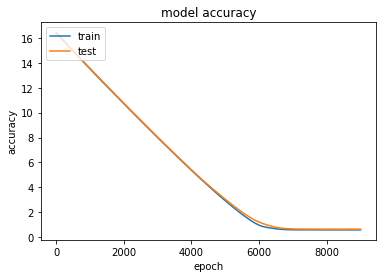

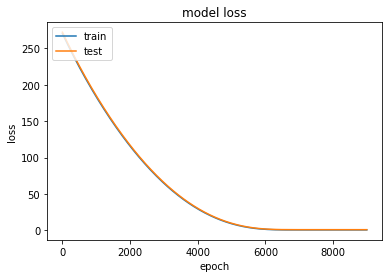

Test loss: 1.0254109914486225
Test MAE: 0.6406611204147339


In [79]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
loss,acc = model.evaluate(X_test, y_test, verbose=0)
    
print('Test loss:', loss)
print('Test MAE:', acc)